In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
#n_units=512
n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)

output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 1024)             3072      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 1024)             1049600   
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 1024)             1049600   
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test.reshape((-1,1)))).reshape((44, 2, 1))

In [27]:
tsr_theta_train.shape

(394, 2, 1)

In [28]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 4ms/step - loss: 1.2870 - rmse: 1.1344
Epoch 2/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.2584 - rmse: 0.5083
Epoch 3/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0845 - rmse: 0.2907
Epoch 4/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0504 - rmse: 0.2244
Epoch 5/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0318 - rmse: 0.1783
Epoch 6/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0255 - rmse: 0.1598
Epoch 7/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0259 - rmse: 0.1610
Epoch 8/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0265 - rmse: 0.1629
Epoch 9/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0256 - rmse: 0.1601
Epoch 10/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0260 - rmse: 0.1613
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 4ms/step - loss: 0.0252 - rmse: 0.1589
Epoch 85/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1559
Epoch 86/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0235 - rmse: 0.1533
Epoch 87/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0253 - rmse: 0.1592
Epoch 88/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0255 - rmse: 0.1596
Epoch 89/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0260 - rmse: 0.1612
Epoch 90/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.1620
Epoch 91/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0303 - rmse: 0.1741
Epoch 92/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0253 - rmse: 0.1590
Epoch 93/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1553
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 4ms/step - loss: 0.0259 - rmse: 0.1609
Epoch 168/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0296 - rmse: 0.1722
Epoch 169/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0262 - rmse: 0.1617
Epoch 170/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0255 - rmse: 0.1598
Epoch 171/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0248 - rmse: 0.1576
Epoch 172/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1580
Epoch 173/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1499
Epoch 174/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0219 - rmse: 0.1479
Epoch 175/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1499
Epoch 176/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.1443
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0240 - rmse: 0.1549
Epoch 250/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0253 - rmse: 0.1592
Epoch 251/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1519
Epoch 252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0240 - rmse: 0.1550
Epoch 253/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1502
Epoch 254/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0218 - rmse: 0.1475
Epoch 255/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1483
Epoch 256/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1492
Epoch 257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1467
Epoch 258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1492
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 332/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1409
Epoch 333/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1417
Epoch 334/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1408
Epoch 335/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 336/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 337/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 339/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.1423
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 414/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 415/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 416/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 417/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 418/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 419/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 420/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 421/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1402
Epoch 422/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 496/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1391
Epoch 497/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1402
Epoch 498/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 499/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 500/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 501/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 502/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 503/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 504/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 578/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 579/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1369
Epoch 580/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 581/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 582/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1358
Epoch 583/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 584/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 585/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1362
Epoch 586/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 660/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 661/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 662/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 663/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 664/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 665/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 666/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 667/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 668/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0184 - rmse: 0.1356
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 742/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1352
Epoch 743/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 744/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 745/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1325
Epoch 746/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 747/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 748/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1324
Epoch 749/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1321
Epoch 750/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 824/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 825/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 826/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 827/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 828/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 829/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 830/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 831/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 832/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1321
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 907/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 908/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 909/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 910/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 911/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 912/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 913/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 914/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 915/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 988/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1302
Epoch 989/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 990/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 991/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 992/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 993/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 994/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 995/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 996/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 997/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 1070/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 1071/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 1072/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 1073/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 1074/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1301
Epoch 1075/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 1076/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 1077/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 1078/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 1079/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 1152/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 1153/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1306
Epoch 1154/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 1155/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 1156/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 1157/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 1158/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 1159/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 1160/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 1161/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 1234/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 1235/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 1236/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 1237/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 1238/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 1239/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 1240/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 1241/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 1242/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 1243/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 1316/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 1317/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 1318/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 1319/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 1320/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 1321/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 1322/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 1323/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 1324/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 1325/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1244
Epoch 1398/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 1399/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 1400/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 1401/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 1402/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 1403/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 1404/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 1405/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 1406/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 1407/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 1480/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1223
Epoch 1481/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1223
Epoch 1482/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1242
Epoch 1483/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 1484/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 1485/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1224
Epoch 1486/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 1487/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 1488/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 1489/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1198
Epoch 1562/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1213
Epoch 1563/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 1564/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 1565/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 1566/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1200
Epoch 1567/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 1568/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 1569/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1228
Epoch 1570/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 1571/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 1644/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 1645/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1247
Epoch 1646/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1241
Epoch 1647/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.1185
Epoch 1648/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 1649/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1186
Epoch 1650/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 1651/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 1652/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1177
Epoch 1653/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1148
Epoch 1726/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1123
Epoch 1727/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0138 - rmse: 0.1176
Epoch 1728/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1142
Epoch 1729/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1156
Epoch 1730/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 1731/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 1732/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 1733/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 1734/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 1735/10000


10/10 [==============================] - 0s 3ms/step - loss: 0.0129 - rmse: 0.1135
Epoch 1808/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 1809/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 1810/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1173
Epoch 1811/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1140
Epoch 1812/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1122
Epoch 1813/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1146
Epoch 1814/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1095
Epoch 1815/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 1816/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1162
Epoch 1817/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1128
Epoch 1890/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 1891/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1064
Epoch 1892/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1162
Epoch 1893/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1162
Epoch 1894/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1213
Epoch 1895/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1151
Epoch 1896/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1238
Epoch 1897/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1210
Epoch 1898/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1116
Epoch 1899/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1051
Epoch 1972/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1072
Epoch 1973/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 1974/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 1975/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1172
Epoch 1976/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 1977/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 1978/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1129
Epoch 1979/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 1980/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1123
Epoch 1981/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1046
Epoch 2054/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.1137
Epoch 2056/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 2057/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 2058/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1282
Epoch 2059/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 2060/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 2061/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 2062/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1170
Epoch 2063/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1111
Epoch 2136/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 2137/10000
10/10 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 2138/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 2139/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 2140/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 2141/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 2142/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1172
Epoch 2143/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1150
Epoch 2144/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1121
Epoch 2145/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0991
Epoch 2218/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1043
Epoch 2219/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1088
Epoch 2220/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 2221/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1089
Epoch 2222/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 2223/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 2224/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 2225/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0961
Epoch 2226/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0950
Epoch 2227/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1039
Epoch 2300/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 2301/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1014
Epoch 2302/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 2303/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 2304/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 2305/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 2306/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 2307/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0911
Epoch 2308/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 2309/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1047
Epoch 2382/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 2383/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1056
Epoch 2384/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 2385/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 2386/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 2387/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0987
Epoch 2388/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 2389/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1056
Epoch 2390/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 2391/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 2464/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 2465/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0935
Epoch 2466/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1010
Epoch 2467/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 2468/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 2469/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0983
Epoch 2470/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0975
Epoch 2471/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 2472/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 2473/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0941
Epoch 2546/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 2547/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 2548/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 2549/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 2550/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1093
Epoch 2551/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0966
Epoch 2552/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 2553/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0856
Epoch 2554/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 2555/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0955
Epoch 2628/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 2629/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1060
Epoch 2630/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0914
Epoch 2631/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 2632/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 2633/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0760
Epoch 2634/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 2635/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 2636/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 2637/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 2710/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 2711/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0952
Epoch 2712/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 2713/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0907
Epoch 2714/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0912
Epoch 2715/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 2716/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 2717/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 2718/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 2719/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0919
Epoch 2792/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0951
Epoch 2793/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 2794/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0929
Epoch 2795/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 2796/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 2797/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 2798/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 2799/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0778
Epoch 2800/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 2801/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0696
Epoch 2874/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 2875/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0778
Epoch 2876/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 2877/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0977
Epoch 2878/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 2879/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 2880/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 2881/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 2882/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 2883/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 2956/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0667
Epoch 2957/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 2958/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 2959/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 2960/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 2961/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 2962/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 2963/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0866
Epoch 2964/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 2965/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 3038/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 3039/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 3040/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 3041/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1012
Epoch 3042/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 3043/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 3044/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 3045/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 3046/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 3047/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 3120/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 3121/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 3122/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 3123/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 3124/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 3125/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 3126/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0802
Epoch 3127/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 3128/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 3129/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 3202/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 3203/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 3204/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 3205/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 3206/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 3207/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 3208/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 3209/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1136
Epoch 3210/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1214
Epoch 3211/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 3284/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0901
Epoch 3285/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 3286/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 3287/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 3288/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 3289/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0885
Epoch 3290/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0992
Epoch 3291/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 3292/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 3293/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 3366/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 3367/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 3368/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 3369/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 3370/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0995
Epoch 3371/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 3372/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 3373/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1060
Epoch 3374/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 3375/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0940
Epoch 3448/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 3449/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 3450/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1157
Epoch 3451/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 3452/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 3453/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 3454/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0765
Epoch 3455/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 3456/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 3457/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 3530/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0775
Epoch 3531/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 3532/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 3533/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 3534/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0745
Epoch 3535/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 3536/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 3537/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 3538/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 3539/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 3612/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 3613/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 3615/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 3616/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 3618/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 3619/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 3620/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 3621/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 3694/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0801
Epoch 3695/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 3696/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 3697/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 3698/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 3699/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0596
Epoch 3700/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 3701/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 3702/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0636
Epoch 3703/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 3776/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1429
Epoch 3777/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 3778/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1160
Epoch 3779/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1130
Epoch 3780/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 3781/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1046
Epoch 3782/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1012
Epoch 3783/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 3784/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0956
Epoch 3785/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 3858/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 3859/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 3860/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 3861/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1072
Epoch 3862/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0966
Epoch 3863/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 3864/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 3865/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 3866/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 3867/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1039
Epoch 3940/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 3941/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0911
Epoch 3942/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 3943/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 3944/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 3945/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 3946/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 3947/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 3948/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 3949/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 4022/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 4023/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 4024/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 4025/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 4026/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 4027/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4028/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 4029/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 4030/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 4031/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 4104/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 4105/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 4106/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0666
Epoch 4107/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 4108/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 4109/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 4110/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 4111/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4112/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 4113/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 4186/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 4187/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 4188/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 4189/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 4190/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 4191/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 4192/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 4193/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 4194/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 4195/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 4268/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 4269/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 4270/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 4271/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 4272/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 4273/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0441
Epoch 4274/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 4275/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 4276/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0453
Epoch 4277/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1129
Epoch 4350/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1097
Epoch 4351/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 4352/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1079
Epoch 4353/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1044
Epoch 4354/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 4355/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1034
Epoch 4356/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1023
Epoch 4357/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1027
Epoch 4358/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1023
Epoch 4359/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0902
Epoch 4432/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 4433/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 4434/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 4435/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 4436/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 4437/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0666
Epoch 4438/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 4439/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 4440/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 4441/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 4514/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1096
Epoch 4515/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0924
Epoch 4516/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 4517/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 4518/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 4519/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 4520/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 4521/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 4522/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 4523/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 4596/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 4597/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 4598/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 4599/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 4600/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0942
Epoch 4601/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 4602/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 4603/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 4604/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 4605/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1228
Epoch 4678/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 4679/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0972
Epoch 4680/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 4681/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 4682/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0828
Epoch 4683/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0758
Epoch 4684/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 4685/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 4686/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 4687/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 4760/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 4761/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1138
Epoch 4762/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0951
Epoch 4763/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 4764/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 4765/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0934
Epoch 4766/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 4767/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 4768/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 4769/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 4842/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 4843/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 4844/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 4845/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 4846/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 4847/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 4848/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 4849/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 4850/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 4851/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 4924/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 4925/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 4926/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 4927/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 4928/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 4929/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 4930/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 4931/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 4932/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 4933/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 5006/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 5007/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 5008/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 5009/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0919
Epoch 5010/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 5011/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5012/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 5013/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 5014/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0914
Epoch 5015/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 5088/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 5089/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1429
Epoch 5090/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1489
Epoch 5091/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 5092/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1088
Epoch 5093/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 5094/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 5095/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0765
Epoch 5096/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 5097/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 5170/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1138
Epoch 5171/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1235
Epoch 5172/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 5173/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 5174/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 5175/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 5176/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 5177/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 5178/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 5179/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 5252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 5253/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 5254/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9658e-04 - rmse: 0.0299
Epoch 5255/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0871e-04 - rmse: 0.0301
Epoch 5256/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 5257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 5258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 5259/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1228
Epoch 5260/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1099
Epoch 526

10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 5333/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 5334/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 5335/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 5336/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1079
Epoch 5337/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 5338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 5339/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 5340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 5341/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 5342/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 5414/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5415/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 5416/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 5417/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 5418/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 5419/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 5420/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7494e-04 - rmse: 0.0312
Epoch 5421/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4470e-04 - rmse: 0.0291
Epoch 5422/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4747e-04 - rmse: 0.0308
Epoch

Epoch 5495/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 5496/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 5497/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 5498/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 5499/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 5500/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 5501/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 5502/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 5503/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 5504/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0618


10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 5577/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 5578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 5579/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 5580/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 5581/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 5582/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 5583/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 5584/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 5585/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 5586/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 5659/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 5660/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 5661/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 5662/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5663/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 5664/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 5665/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 5666/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 5667/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 5668/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0991
Epoch 5741/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0891
Epoch 5742/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 5743/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 5744/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 5745/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 5746/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 5747/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 5748/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 5749/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0701
Epoch 5750/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 5823/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 5824/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 5825/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 5826/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 5827/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 5828/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 5829/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 5830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 5831/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 5832/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 5904/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 5905/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 5906/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0985
Epoch 5907/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 5908/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 5909/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 5910/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 5911/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 5912/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0790
Epoch 5913/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 5985/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 5986/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5987/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 5988/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 5989/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8592e-04 - rmse: 0.0298
Epoch 5990/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7773e-04 - rmse: 0.0279
Epoch 5991/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 5992/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 5993/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9763e-04 - rmse: 0.0300
Epoch

10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 6065/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 6066/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 6067/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5907e-04 - rmse: 0.0276
Epoch 6068/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4154e-04 - rmse: 0.0272
Epoch 6069/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3829e-04 - rmse: 0.0306
Epoch 6070/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9116e-04 - rmse: 0.0299
Epoch 6071/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7229e-04 - rmse: 0.0259
Epoch 6072/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8607e-04 - rmse: 0.0262
Epoch 6073/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 

10/10 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 6146/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 6147/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1089
Epoch 6148/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 6149/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 6150/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 6151/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 6152/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 6153/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0901
Epoch 6154/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1093
Epoch 6155/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 6228/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 6229/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 6230/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 6231/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6232/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 6233/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 6234/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 6235/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6236/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6237/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 6310/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 6311/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 6312/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 6313/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 6314/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 6315/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 6316/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 6317/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 6318/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 6319/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 6391/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 6392/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 6393/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6394/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 6395/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 6396/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 6397/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 6398/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 6399/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 6400/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 6473/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7019e-04 - rmse: 0.0311
Epoch 6474/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 6475/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9879e-04 - rmse: 0.0300
Epoch 6476/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 6477/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 6478/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 6479/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2581e-04 - rmse: 0.0304
Epoch 6480/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 6481/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1393e-04 - rmse: 0.0302
E

10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 6554/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 6555/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 6556/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 6557/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6558/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0612
Epoch 6559/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0930
Epoch 6560/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 6561/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6562/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 6563/10000


10/10 [==============================] - 0s 4ms/step - loss: 9.3491e-04 - rmse: 0.0306
Epoch 6635/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1597e-04 - rmse: 0.0286
Epoch 6636/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2637e-04 - rmse: 0.0270
Epoch 6637/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5941e-04 - rmse: 0.0276
Epoch 6638/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8410e-04 - rmse: 0.0280
Epoch 6639/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9813e-04 - rmse: 0.0264
Epoch 6640/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0440e-04 - rmse: 0.0265
Epoch 6641/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1889e-04 - rmse: 0.0286
Epoch 6642/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7806e-04 - rmse: 0.0313
Epoch 6643/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0

10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 6715/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1553e-04 - rmse: 0.0286
Epoch 6716/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6015e-04 - rmse: 0.0237
Epoch 6717/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5215e-04 - rmse: 0.0235
Epoch 6718/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4613e-04 - rmse: 0.0234
Epoch 6719/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9247e-04 - rmse: 0.0243
Epoch 6720/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4772e-04 - rmse: 0.0273
Epoch 6721/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4773e-04 - rmse: 0.0273
Epoch 6722/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8994e-04 - rmse: 0.0243
Epoch 6723/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3410e

10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 6796/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 6797/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 6798/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 6799/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 6800/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 6801/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 6802/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1140
Epoch 6803/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0945
Epoch 6804/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0845
Epoch 6805/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1024
Epoch 6878/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 6879/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 6880/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 6881/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 6882/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 6883/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 6884/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1249e-04 - rmse: 0.0302
Epoch 6885/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 6886/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 6887/10

10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0977
Epoch 6958/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 6959/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 6960/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 6961/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 6962/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 6963/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 6964/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9226e-04 - rmse: 0.0315
Epoch 6965/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3920e-04 - rmse: 0.0272
Epoch 6966/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0360e-04 - rmse: 0.0265
Epoch

10/10 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 7039/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 7040/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 7041/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 7042/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 7043/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 7044/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 7045/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 7046/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 7047/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 7048/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 7120/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3667e-04 - rmse: 0.0306
Epoch 7121/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 7122/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9695e-04 - rmse: 0.0282
Epoch 7123/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3200e-04 - rmse: 0.0251
Epoch 7124/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5696e-04 - rmse: 0.0236
Epoch 7125/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2389e-04 - rmse: 0.0229
Epoch 7126/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9194e-04 - rmse: 0.0222
Epoch 7127/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9156e-04 - rmse: 0.0222
Epoch 7128/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3774e-04 

10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 7200/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 7201/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 7202/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 7203/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 7204/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 7205/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 7206/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 7207/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 7208/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 7209/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 7282/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7283/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 7284/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 7285/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 7286/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 7287/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7288/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 7289/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7290/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 7291/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 7364/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 7365/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 7366/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 7367/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 7368/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 7369/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 7370/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 7371/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 7372/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 7373/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 7445/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 7446/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1123
Epoch 7447/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 7448/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0902
Epoch 7449/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 7450/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 7451/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 7452/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 7453/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 7454/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 7526/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 7527/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 7528/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 7529/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 7530/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 7531/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 7532/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 7533/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7534/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 7535/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7607/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 7608/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 7609/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3458e-04 - rmse: 0.0289
Epoch 7610/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8222e-04 - rmse: 0.0261
Epoch 7611/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2933e-04 - rmse: 0.0251
Epoch 7612/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2996e-04 - rmse: 0.0251
Epoch 7613/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8558e-04 - rmse: 0.0242
Epoch 7614/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7575e-04 - rmse: 0.0240
Epoch 7615/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7632e-04 - rm

10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 7687/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 7688/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 7689/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0952
Epoch 7690/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0197 - rmse: 0.1405
Epoch 7691/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1200
Epoch 7692/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 7693/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0908
Epoch 7694/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 7695/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 7696/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 7769/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7770/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7771/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 7772/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 7773/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7774/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 7775/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 7776/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 7777/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7778/10000


Epoch 7850/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0888
Epoch 7851/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 7852/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 7853/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 7854/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 7855/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7856/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 7857/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 7858/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 7859/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402


10/10 [==============================] - 0s 4ms/step - loss: 7.6721e-04 - rmse: 0.0277
Epoch 7932/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5015e-04 - rmse: 0.0274
Epoch 7933/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2789e-04 - rmse: 0.0305
Epoch 7934/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6277e-04 - rmse: 0.0276
Epoch 7935/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9660e-04 - rmse: 0.0299
Epoch 7936/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 7937/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 7938/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 7939/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3128e-04 - rmse: 0.0270
Epoch 7940/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4373e-04 - rm

10/10 [==============================] - 0s 4ms/step - loss: 4.4420e-04 - rmse: 0.0211
Epoch 8012/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6398e-04 - rmse: 0.0215
Epoch 8013/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1019e-04 - rmse: 0.0203
Epoch 8014/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1958e-04 - rmse: 0.0228
Epoch 8015/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6044e-04 - rmse: 0.0237
Epoch 8016/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2128e-04 - rmse: 0.0228
Epoch 8017/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1782e-04 - rmse: 0.0228
Epoch 8018/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4160e-04 - rmse: 0.0233
Epoch 8019/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9989e-04 - rmse: 0.0200
Epoch 8020/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8

10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 8092/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 8093/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 8094/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 8095/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 8096/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0069e-04 - rmse: 0.0300
Epoch 8097/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0487e-04 - rmse: 0.0246
Epoch 8098/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1270e-04 - rmse: 0.0285
Epoch 8099/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 8100/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0727
Epoch

10/10 [==============================] - 0s 4ms/step - loss: 2.7523e-04 - rmse: 0.0166
Epoch 8172/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0058e-04 - rmse: 0.0173
Epoch 8173/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4525e-04 - rmse: 0.0186
Epoch 8174/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3483e-04 - rmse: 0.0183
Epoch 8175/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9982e-04 - rmse: 0.0173
Epoch 8176/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0887e-04 - rmse: 0.0176
Epoch 8177/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2035e-04 - rmse: 0.0179
Epoch 8178/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7538e-04 - rmse: 0.0166
Epoch 8179/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7995e-04 - rmse: 0.0167
Epoch 8180/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2

10/10 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 8251/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 8252/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 8253/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1227
Epoch 8254/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 8255/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1173
Epoch 8256/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 8257/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1142
Epoch 8258/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1128
Epoch 8259/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1120
Epoch 8260/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 8333/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 8334/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1161
Epoch 8335/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1034
Epoch 8336/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 8337/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 8338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 8339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 8340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 8341/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 8342/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 8415/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 8416/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 8417/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8418/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 8419/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8420/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 8421/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8422/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 8423/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8424/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 8497/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 8498/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 8499/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 8500/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 8501/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 8502/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 8503/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 8504/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 8505/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 8506/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 8578/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 8579/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 8580/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 8581/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 8582/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 8583/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 8584/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 8585/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 8586/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 8587/10000


10/10 [==============================] - 0s 4ms/step - loss: 6.7286e-04 - rmse: 0.0259
Epoch 8659/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7966e-04 - rmse: 0.0241
Epoch 8660/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6077e-04 - rmse: 0.0237
Epoch 8661/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8456e-04 - rmse: 0.0242
Epoch 8662/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8268e-04 - rmse: 0.0241
Epoch 8663/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9653e-04 - rmse: 0.0244
Epoch 8664/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0610e-04 - rmse: 0.0246
Epoch 8665/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1051e-04 - rmse: 0.0247
Epoch 8666/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7516e-04 - rmse: 0.0240
Epoch 8667/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8

10/10 [==============================] - 0s 4ms/step - loss: 9.1970e-04 - rmse: 0.0303
Epoch 8740/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5859e-04 - rmse: 0.0310
Epoch 8741/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1836e-04 - rmse: 0.0286
Epoch 8742/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3317e-04 - rmse: 0.0305
Epoch 8743/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 8744/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 8745/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8746/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 8747/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3445e-04 - rmse: 0.0289
Epoch 8748/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.03

10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 8821/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0738
Epoch 8822/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 8823/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 8824/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8825/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 8826/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 8827/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 8828/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 8829/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 8830/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 8901/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5681e-04 - rmse: 0.0309
Epoch 8902/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9730e-04 - rmse: 0.0282
Epoch 8903/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0048e-04 - rmse: 0.0265
Epoch 8904/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3121e-04 - rmse: 0.0251
Epoch 8905/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1802e-04 - rmse: 0.0249
Epoch 8906/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8231e-04 - rmse: 0.0241
Epoch 8907/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9570e-04 - rmse: 0.0244
Epoch 8908/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5553e-04 - rmse: 0.0236
Epoch 8909/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0717e

10/10 [==============================] - 0s 4ms/step - loss: 5.5897e-04 - rmse: 0.0236
Epoch 8980/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4526e-04 - rmse: 0.0234
Epoch 8981/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 8982/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5704e-04 - rmse: 0.0293
Epoch 8983/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8611e-04 - rmse: 0.0242
Epoch 8984/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5412e-04 - rmse: 0.0213
Epoch 8985/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1358e-04 - rmse: 0.0203
Epoch 8986/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5909e-04 - rmse: 0.0214
Epoch 8987/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2284e-04 - rmse: 0.0229
Epoch 8988/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3158e

10/10 [==============================] - 0s 4ms/step - loss: 4.3481e-04 - rmse: 0.0209
Epoch 9060/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4609e-04 - rmse: 0.0211
Epoch 9061/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6074e-04 - rmse: 0.0215
Epoch 9062/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2273e-04 - rmse: 0.0229
Epoch 9063/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0127e-04 - rmse: 0.0200
Epoch 9064/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7837e-04 - rmse: 0.0195
Epoch 9065/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0399e-04 - rmse: 0.0201
Epoch 9066/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0436e-04 - rmse: 0.0201
Epoch 9067/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9154e-04 - rmse: 0.0198
Epoch 9068/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8

10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0758
Epoch 9141/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0731
Epoch 9142/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 9143/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 9144/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 9145/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 9146/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 9147/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 9148/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 9149/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 9150/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 9223/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 9224/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 9225/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 9226/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 9227/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0643
Epoch 9228/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 9229/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 9230/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1028
Epoch 9231/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.1001
Epoch 9232/10000


10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 9305/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 9306/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 9307/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 9308/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 9309/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 9310/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 9311/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 9312/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 9313/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 9314/10000


10/10 [==============================] - 0s 4ms/step - loss: 9.4581e-04 - rmse: 0.0308
Epoch 9387/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2190e-04 - rmse: 0.0304
Epoch 9388/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9270e-04 - rmse: 0.0299
Epoch 9389/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9231e-04 - rmse: 0.0281
Epoch 9390/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1539e-04 - rmse: 0.0286
Epoch 9391/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6512e-04 - rmse: 0.0294
Epoch 9392/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8337e-04 - rmse: 0.0280
Epoch 9393/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6779e-04 - rmse: 0.0295
Epoch 9394/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 9395/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0016 

10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 9467/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 9468/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 9469/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 9470/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 9471/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 9472/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 9473/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 9474/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 9475/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 9476/10000


10/10 [==============================] - 0s 4ms/step - loss: 4.3631e-04 - rmse: 0.0209
Epoch 9547/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2140e-04 - rmse: 0.0205
Epoch 9548/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0889e-04 - rmse: 0.0226
Epoch 9549/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6991e-04 - rmse: 0.0217
Epoch 9550/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3472e-04 - rmse: 0.0252
Epoch 9551/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4656e-04 - rmse: 0.0234
Epoch 9552/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8057e-04 - rmse: 0.0241
Epoch 9553/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1847e-04 - rmse: 0.0205
Epoch 9554/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7300e-04 - rmse: 0.0193
Epoch 9555/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7

10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 9626/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 9627/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0561
Epoch 9628/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 9629/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 9630/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 9631/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 9632/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9633/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 9634/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5857e-04 - rmse: 0.0310
Epoch 9635/10

10/10 [==============================] - 0s 4ms/step - loss: 2.9323e-04 - rmse: 0.0171
Epoch 9706/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8195e-04 - rmse: 0.0168
Epoch 9707/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8181e-04 - rmse: 0.0168
Epoch 9708/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8265e-04 - rmse: 0.0168
Epoch 9709/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7252e-04 - rmse: 0.0165
Epoch 9710/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5938e-04 - rmse: 0.0161
Epoch 9711/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6635e-04 - rmse: 0.0163
Epoch 9712/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2723e-04 - rmse: 0.0181
Epoch 9713/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8781e-04 - rmse: 0.0170
Epoch 9714/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

10/10 [==============================] - 0s 4ms/step - loss: 3.0639e-04 - rmse: 0.0175
Epoch 9784/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5718e-04 - rmse: 0.0189
Epoch 9785/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0612e-04 - rmse: 0.0284
Epoch 9786/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5295e-04 - rmse: 0.0188
Epoch 9787/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5481e-04 - rmse: 0.0160
Epoch 9788/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9513e-04 - rmse: 0.0172
Epoch 9789/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1270e-04 - rmse: 0.0146
Epoch 9790/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8760e-04 - rmse: 0.0137
Epoch 9791/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6171e-04 - rmse: 0.0127
Epoch 9792/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6

10/10 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 9864/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 9865/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 9866/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 9867/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9868/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 9869/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 9870/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 9871/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 9872/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 9873/10000


10/10 [==============================] - 0s 5ms/step - loss: 1.8555e-04 - rmse: 0.0136
Epoch 9944/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7552e-04 - rmse: 0.0132
Epoch 9945/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6460e-04 - rmse: 0.0128
Epoch 9946/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6505e-04 - rmse: 0.0128
Epoch 9947/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3178e-04 - rmse: 0.0115
Epoch 9948/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4823e-04 - rmse: 0.0122
Epoch 9949/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3295e-04 - rmse: 0.0115
Epoch 9950/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3266e-04 - rmse: 0.0115
Epoch 9951/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4221e-04 - rmse: 0.0119
Epoch 9952/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

In [29]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:07:15.514224


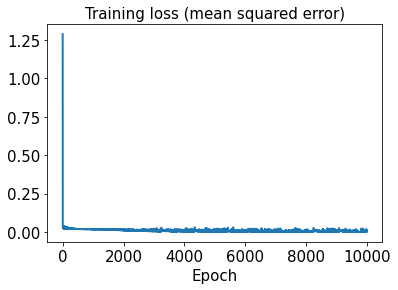

In [30]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

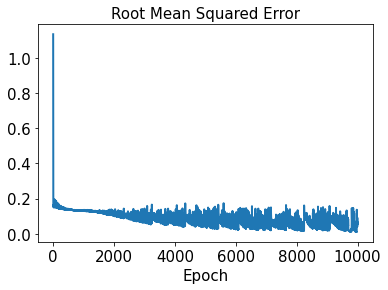

In [31]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [32]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [33]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [34]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.0862554


In [35]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.16220482


In [36]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [37]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

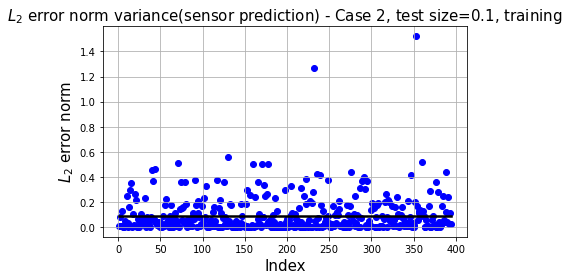

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

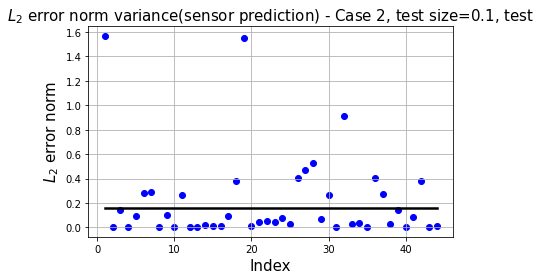

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [40]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [41]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [42]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [43]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.1040
Epoch 2/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.1031
Epoch 3/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0105 - rmse: 0.1015
Epoch 4/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0096 - rmse: 0.0972
Epoch 5/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0886
Epoch 6/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0846
Epoch 7/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 8/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0827
Epoch 9/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 10/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0786
Epoch 11/10000
13/13 [=======

13/13 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0316
Epoch 85/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 86/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 87/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 88/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0303
Epoch 89/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 90/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0295
Epoch 91/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0292
Epoch 92/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.9859e-04 - rmse: 0.0289
Epoch 93/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.8997e-04 - rmse: 0.0288
Epoch 94/10000
13/13 [=====

13/13 [==============================] - 0s 5ms/step - loss: 3.8085e-04 - rmse: 0.0148
Epoch 165/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7774e-04 - rmse: 0.0147
Epoch 166/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7318e-04 - rmse: 0.0146
Epoch 167/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7011e-04 - rmse: 0.0144
Epoch 168/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6651e-04 - rmse: 0.0143
Epoch 169/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6330e-04 - rmse: 0.0142
Epoch 170/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6145e-04 - rmse: 0.0142
Epoch 171/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5994e-04 - rmse: 0.0141
Epoch 172/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5700e-04 - rmse: 0.0140
Epoch 173/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5343e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 2.4173e-04 - rmse: 0.0094
Epoch 244/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4056e-04 - rmse: 0.0093
Epoch 245/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4037e-04 - rmse: 0.0093
Epoch 246/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3918e-04 - rmse: 0.0092
Epoch 247/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3994e-04 - rmse: 0.0093
Epoch 248/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3749e-04 - rmse: 0.0092
Epoch 249/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3614e-04 - rmse: 0.0091
Epoch 250/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3519e-04 - rmse: 0.0090
Epoch 251/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3516e-04 - rmse: 0.0090
Epoch 252/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3403e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.9124e-04 - rmse: 0.0068
Epoch 323/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9089e-04 - rmse: 0.0068
Epoch 324/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9067e-04 - rmse: 0.0068
Epoch 325/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9028e-04 - rmse: 0.0068
Epoch 326/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8998e-04 - rmse: 0.0068
Epoch 327/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8912e-04 - rmse: 0.0067
Epoch 328/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8930e-04 - rmse: 0.0067
Epoch 329/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8884e-04 - rmse: 0.0067
Epoch 330/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8862e-04 - rmse: 0.0067
Epoch 331/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8838e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.6346e-04 - rmse: 0.0054
Epoch 402/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6327e-04 - rmse: 0.0054
Epoch 403/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6295e-04 - rmse: 0.0054
Epoch 404/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6275e-04 - rmse: 0.0054
Epoch 405/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6263e-04 - rmse: 0.0054
Epoch 406/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6237e-04 - rmse: 0.0054
Epoch 407/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6250e-04 - rmse: 0.0054
Epoch 408/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6203e-04 - rmse: 0.0054
Epoch 409/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6163e-04 - rmse: 0.0054
Epoch 410/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.6159e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.4407e-04 - rmse: 0.0046
Epoch 481/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4397e-04 - rmse: 0.0046
Epoch 482/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4412e-04 - rmse: 0.0046
Epoch 483/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4359e-04 - rmse: 0.0046
Epoch 484/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4329e-04 - rmse: 0.0046
Epoch 485/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4348e-04 - rmse: 0.0046
Epoch 486/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4294e-04 - rmse: 0.0046
Epoch 487/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4259e-04 - rmse: 0.0045
Epoch 488/10000
13/13 [==============================] - 0s 6ms/step - loss: 1.4224e-04 - rmse: 0.0045
Epoch 489/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4216e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.2827e-04 - rmse: 0.0040
Epoch 560/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2818e-04 - rmse: 0.0040
Epoch 561/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2815e-04 - rmse: 0.0040
Epoch 562/10000
13/13 [==============================] - 0s 6ms/step - loss: 1.2820e-04 - rmse: 0.0040
Epoch 563/10000
13/13 [==============================] - 0s 6ms/step - loss: 1.2814e-04 - rmse: 0.0040
Epoch 564/10000
13/13 [==============================] - 0s 6ms/step - loss: 1.2807e-04 - rmse: 0.0040
Epoch 565/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2740e-04 - rmse: 0.0040
Epoch 566/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2717e-04 - rmse: 0.0039
Epoch 567/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2683e-04 - rmse: 0.0039
Epoch 568/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.2679e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.1584e-04 - rmse: 0.0036
Epoch 639/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1571e-04 - rmse: 0.0036
Epoch 640/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1543e-04 - rmse: 0.0036
Epoch 641/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1559e-04 - rmse: 0.0036
Epoch 642/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1527e-04 - rmse: 0.0036
Epoch 643/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1510e-04 - rmse: 0.0036
Epoch 644/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1500e-04 - rmse: 0.0036
Epoch 645/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1492e-04 - rmse: 0.0036
Epoch 646/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1500e-04 - rmse: 0.0036
Epoch 647/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1492e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.0507e-04 - rmse: 0.0033
Epoch 718/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0486e-04 - rmse: 0.0033
Epoch 719/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0494e-04 - rmse: 0.0033
Epoch 720/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0476e-04 - rmse: 0.0033
Epoch 721/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0464e-04 - rmse: 0.0033
Epoch 722/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0440e-04 - rmse: 0.0033
Epoch 723/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0451e-04 - rmse: 0.0033
Epoch 724/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0427e-04 - rmse: 0.0033
Epoch 725/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0433e-04 - rmse: 0.0033
Epoch 726/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.0420e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 9.6136e-05 - rmse: 0.0031
Epoch 797/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6336e-05 - rmse: 0.0031
Epoch 798/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6219e-05 - rmse: 0.0031
Epoch 799/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6091e-05 - rmse: 0.0031
Epoch 800/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6407e-05 - rmse: 0.0032
Epoch 801/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6557e-05 - rmse: 0.0032
Epoch 802/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6215e-05 - rmse: 0.0032
Epoch 803/10000
13/13 [==============================] - 0s 6ms/step - loss: 9.5758e-05 - rmse: 0.0031
Epoch 804/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5522e-05 - rmse: 0.0031
Epoch 805/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5377e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 8.8666e-05 - rmse: 0.0030
Epoch 876/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.8609e-05 - rmse: 0.0030
Epoch 877/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.8589e-05 - rmse: 0.0030
Epoch 878/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.8795e-05 - rmse: 0.0030
Epoch 879/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.8838e-05 - rmse: 0.0030
Epoch 880/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.8368e-05 - rmse: 0.0030
Epoch 881/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.8200e-05 - rmse: 0.0030
Epoch 882/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.8052e-05 - rmse: 0.0029
Epoch 883/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.7960e-05 - rmse: 0.0029
Epoch 884/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.7979e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 8.1873e-05 - rmse: 0.0028
Epoch 955/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1863e-05 - rmse: 0.0028
Epoch 956/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.2048e-05 - rmse: 0.0028
Epoch 957/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.2139e-05 - rmse: 0.0029
Epoch 958/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1857e-05 - rmse: 0.0028
Epoch 959/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1820e-05 - rmse: 0.0028
Epoch 960/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1799e-05 - rmse: 0.0028
Epoch 961/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1839e-05 - rmse: 0.0028
Epoch 962/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1619e-05 - rmse: 0.0028
Epoch 963/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1421e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 7.6347e-05 - rmse: 0.0027
Epoch 1034/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.6345e-05 - rmse: 0.0027
Epoch 1035/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.6422e-05 - rmse: 0.0027
Epoch 1036/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.6054e-05 - rmse: 0.0027
Epoch 1037/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.5934e-05 - rmse: 0.0027
Epoch 1038/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.5826e-05 - rmse: 0.0026
Epoch 1039/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.5912e-05 - rmse: 0.0027
Epoch 1040/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.6503e-05 - rmse: 0.0028
Epoch 1041/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.6120e-05 - rmse: 0.0027
Epoch 1042/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.5

13/13 [==============================] - 0s 5ms/step - loss: 7.1891e-05 - rmse: 0.0027
Epoch 1112/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1797e-05 - rmse: 0.0027
Epoch 1113/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1507e-05 - rmse: 0.0026
Epoch 1114/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1317e-05 - rmse: 0.0026
Epoch 1115/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1213e-05 - rmse: 0.0026
Epoch 1116/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0944e-05 - rmse: 0.0026
Epoch 1117/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0769e-05 - rmse: 0.0025
Epoch 1118/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0743e-05 - rmse: 0.0025
Epoch 1119/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0688e-05 - rmse: 0.0025
Epoch 1120/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.0

13/13 [==============================] - 0s 5ms/step - loss: 6.7184e-05 - rmse: 0.0025
Epoch 1190/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.7066e-05 - rmse: 0.0025
Epoch 1191/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.6880e-05 - rmse: 0.0025
Epoch 1192/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.6871e-05 - rmse: 0.0025
Epoch 1193/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.6702e-05 - rmse: 0.0025
Epoch 1194/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.6596e-05 - rmse: 0.0025
Epoch 1195/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.6752e-05 - rmse: 0.0025
Epoch 1196/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.7110e-05 - rmse: 0.0026
Epoch 1197/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.7387e-05 - rmse: 0.0026
Epoch 1198/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.7

13/13 [==============================] - 0s 5ms/step - loss: 6.3381e-05 - rmse: 0.0025
Epoch 1268/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3397e-05 - rmse: 0.0025
Epoch 1269/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3070e-05 - rmse: 0.0024
Epoch 1270/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2930e-05 - rmse: 0.0024
Epoch 1271/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3142e-05 - rmse: 0.0024
Epoch 1272/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3098e-05 - rmse: 0.0024
Epoch 1273/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3076e-05 - rmse: 0.0024
Epoch 1274/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2910e-05 - rmse: 0.0024
Epoch 1275/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2843e-05 - rmse: 0.0024
Epoch 1276/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.2

13/13 [==============================] - 0s 5ms/step - loss: 6.0142e-05 - rmse: 0.0024
Epoch 1346/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.0204e-05 - rmse: 0.0024
Epoch 1347/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9956e-05 - rmse: 0.0024
Epoch 1348/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9781e-05 - rmse: 0.0024
Epoch 1349/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9676e-05 - rmse: 0.0024
Epoch 1350/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9535e-05 - rmse: 0.0023
Epoch 1351/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9462e-05 - rmse: 0.0023
Epoch 1352/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9432e-05 - rmse: 0.0023
Epoch 1353/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9336e-05 - rmse: 0.0023
Epoch 1354/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.9

13/13 [==============================] - 0s 5ms/step - loss: 5.6814e-05 - rmse: 0.0023
Epoch 1424/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6843e-05 - rmse: 0.0023
Epoch 1425/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6696e-05 - rmse: 0.0023
Epoch 1426/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6812e-05 - rmse: 0.0023
Epoch 1427/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6758e-05 - rmse: 0.0023
Epoch 1428/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6713e-05 - rmse: 0.0023
Epoch 1429/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6653e-05 - rmse: 0.0023
Epoch 1430/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6617e-05 - rmse: 0.0023
Epoch 1431/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6606e-05 - rmse: 0.0023
Epoch 1432/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.6

13/13 [==============================] - 0s 5ms/step - loss: 5.4219e-05 - rmse: 0.0023
Epoch 1502/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4153e-05 - rmse: 0.0023
Epoch 1503/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4404e-05 - rmse: 0.0023
Epoch 1504/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4619e-05 - rmse: 0.0024
Epoch 1505/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4237e-05 - rmse: 0.0023
Epoch 1506/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4155e-05 - rmse: 0.0023
Epoch 1507/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4207e-05 - rmse: 0.0023
Epoch 1508/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.4086e-05 - rmse: 0.0023
Epoch 1509/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3875e-05 - rmse: 0.0022
Epoch 1510/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3

13/13 [==============================] - 0s 5ms/step - loss: 5.1815e-05 - rmse: 0.0022
Epoch 1580/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1744e-05 - rmse: 0.0022
Epoch 1581/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2145e-05 - rmse: 0.0023
Epoch 1582/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2162e-05 - rmse: 0.0023
Epoch 1583/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1996e-05 - rmse: 0.0023
Epoch 1584/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2117e-05 - rmse: 0.0023
Epoch 1585/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2119e-05 - rmse: 0.0023
Epoch 1586/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1861e-05 - rmse: 0.0023
Epoch 1587/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.1936e-05 - rmse: 0.0023
Epoch 1588/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2

13/13 [==============================] - 0s 5ms/step - loss: 5.0124e-05 - rmse: 0.0023
Epoch 1658/10000
13/13 [==============================] - 0s 6ms/step - loss: 4.9755e-05 - rmse: 0.0022
Epoch 1659/10000
13/13 [==============================] - 0s 6ms/step - loss: 4.9566e-05 - rmse: 0.0021
Epoch 1660/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9553e-05 - rmse: 0.0022
Epoch 1661/10000
13/13 [==============================] - 0s 6ms/step - loss: 4.9441e-05 - rmse: 0.0021
Epoch 1662/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9515e-05 - rmse: 0.0022
Epoch 1663/10000
13/13 [==============================] - 0s 6ms/step - loss: 4.9702e-05 - rmse: 0.0022
Epoch 1664/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9563e-05 - rmse: 0.0022
Epoch 1665/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.9417e-05 - rmse: 0.0021
Epoch 1666/10000
13/13 [==============================] - 0s 6ms/step - loss: 4.9

13/13 [==============================] - 0s 5ms/step - loss: 4.7600e-05 - rmse: 0.0021
Epoch 1736/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7453e-05 - rmse: 0.0021
Epoch 1737/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7555e-05 - rmse: 0.0021
Epoch 1738/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7461e-05 - rmse: 0.0021
Epoch 1739/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7514e-05 - rmse: 0.0021
Epoch 1740/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7501e-05 - rmse: 0.0021
Epoch 1741/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7552e-05 - rmse: 0.0021
Epoch 1742/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7427e-05 - rmse: 0.0021
Epoch 1743/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7764e-05 - rmse: 0.0022
Epoch 1744/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.7

13/13 [==============================] - 0s 5ms/step - loss: 4.6192e-05 - rmse: 0.0021
Epoch 1814/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6206e-05 - rmse: 0.0021
Epoch 1815/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.6105e-05 - rmse: 0.0021
Epoch 1816/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5959e-05 - rmse: 0.0021
Epoch 1817/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5922e-05 - rmse: 0.0021
Epoch 1818/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5681e-05 - rmse: 0.0020
Epoch 1819/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5799e-05 - rmse: 0.0021
Epoch 1820/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5734e-05 - rmse: 0.0021
Epoch 1821/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5868e-05 - rmse: 0.0021
Epoch 1822/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5

13/13 [==============================] - 0s 5ms/step - loss: 4.4445e-05 - rmse: 0.0021
Epoch 1892/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4470e-05 - rmse: 0.0021
Epoch 1893/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4466e-05 - rmse: 0.0021
Epoch 1894/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4573e-05 - rmse: 0.0021
Epoch 1895/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4658e-05 - rmse: 0.0021
Epoch 1896/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4557e-05 - rmse: 0.0021
Epoch 1897/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4442e-05 - rmse: 0.0021
Epoch 1898/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4605e-05 - rmse: 0.0021
Epoch 1899/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4727e-05 - rmse: 0.0022
Epoch 1900/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4

13/13 [==============================] - 0s 5ms/step - loss: 4.3204e-05 - rmse: 0.0021
Epoch 1970/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2897e-05 - rmse: 0.0020
Epoch 1971/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2860e-05 - rmse: 0.0020
Epoch 1972/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2773e-05 - rmse: 0.0020
Epoch 1973/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2730e-05 - rmse: 0.0020
Epoch 1974/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2694e-05 - rmse: 0.0020
Epoch 1975/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2721e-05 - rmse: 0.0020
Epoch 1976/10000
13/13 [==============================] - 0s 6ms/step - loss: 4.2967e-05 - rmse: 0.0020
Epoch 1977/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2850e-05 - rmse: 0.0020
Epoch 1978/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2

13/13 [==============================] - 0s 5ms/step - loss: 4.1831e-05 - rmse: 0.0020
Epoch 2048/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1653e-05 - rmse: 0.0020
Epoch 2049/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1497e-05 - rmse: 0.0019
Epoch 2050/10000
13/13 [==============================] - 0s 6ms/step - loss: 4.1421e-05 - rmse: 0.0019
Epoch 2051/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1516e-05 - rmse: 0.0020
Epoch 2052/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1633e-05 - rmse: 0.0020
Epoch 2053/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1566e-05 - rmse: 0.0020
Epoch 2054/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1381e-05 - rmse: 0.0019
Epoch 2055/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1330e-05 - rmse: 0.0019
Epoch 2056/10000
13/13 [==============================] - 0s 6ms/step - loss: 4.1

13/13 [==============================] - 0s 5ms/step - loss: 4.0551e-05 - rmse: 0.0020
Epoch 2126/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0594e-05 - rmse: 0.0020
Epoch 2127/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0579e-05 - rmse: 0.0020
Epoch 2128/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0498e-05 - rmse: 0.0020
Epoch 2129/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0491e-05 - rmse: 0.0020
Epoch 2130/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0617e-05 - rmse: 0.0020
Epoch 2131/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0659e-05 - rmse: 0.0020
Epoch 2132/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0557e-05 - rmse: 0.0020
Epoch 2133/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.1006e-05 - rmse: 0.0021
Epoch 2134/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0

13/13 [==============================] - 0s 6ms/step - loss: 4.0102e-05 - rmse: 0.0021
Epoch 2204/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.9753e-05 - rmse: 0.0020
Epoch 2205/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9499e-05 - rmse: 0.0020
Epoch 2206/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9403e-05 - rmse: 0.0019
Epoch 2207/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9232e-05 - rmse: 0.0019
Epoch 2208/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.9184e-05 - rmse: 0.0019
Epoch 2209/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.9072e-05 - rmse: 0.0019
Epoch 2210/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.9097e-05 - rmse: 0.0019
Epoch 2211/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.9143e-05 - rmse: 0.0019
Epoch 2212/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9

13/13 [==============================] - 0s 6ms/step - loss: 3.8589e-05 - rmse: 0.0020
Epoch 2282/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8612e-05 - rmse: 0.0020
Epoch 2283/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9047e-05 - rmse: 0.0021
Epoch 2284/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8793e-05 - rmse: 0.0020
Epoch 2285/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.8548e-05 - rmse: 0.0020
Epoch 2286/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.8342e-05 - rmse: 0.0019
Epoch 2287/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.8298e-05 - rmse: 0.0019
Epoch 2288/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8231e-05 - rmse: 0.0019
Epoch 2289/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8185e-05 - rmse: 0.0019
Epoch 2290/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.8

13/13 [==============================] - 0s 5ms/step - loss: 3.7748e-05 - rmse: 0.0020
Epoch 2360/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7675e-05 - rmse: 0.0019
Epoch 2361/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7725e-05 - rmse: 0.0020
Epoch 2362/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7970e-05 - rmse: 0.0020
Epoch 2363/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7735e-05 - rmse: 0.0020
Epoch 2364/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7608e-05 - rmse: 0.0019
Epoch 2365/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7468e-05 - rmse: 0.0019
Epoch 2366/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7386e-05 - rmse: 0.0019
Epoch 2367/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7508e-05 - rmse: 0.0019
Epoch 2368/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7

13/13 [==============================] - 0s 5ms/step - loss: 3.6580e-05 - rmse: 0.0018
Epoch 2438/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6614e-05 - rmse: 0.0019
Epoch 2439/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6775e-05 - rmse: 0.0019
Epoch 2440/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6889e-05 - rmse: 0.0019
Epoch 2441/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6855e-05 - rmse: 0.0019
Epoch 2442/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6592e-05 - rmse: 0.0019
Epoch 2443/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6548e-05 - rmse: 0.0019
Epoch 2444/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6437e-05 - rmse: 0.0018
Epoch 2445/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6361e-05 - rmse: 0.0018
Epoch 2446/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.6598e-05 - rmse: 0.0020
Epoch 2516/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6528e-05 - rmse: 0.0020
Epoch 2517/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6426e-05 - rmse: 0.0020
Epoch 2518/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6014e-05 - rmse: 0.0019
Epoch 2519/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5868e-05 - rmse: 0.0019
Epoch 2520/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5938e-05 - rmse: 0.0019
Epoch 2521/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6257e-05 - rmse: 0.0020
Epoch 2522/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6705e-05 - rmse: 0.0021
Epoch 2523/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6722e-05 - rmse: 0.0021
Epoch 2524/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.5346e-05 - rmse: 0.0019
Epoch 2594/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5106e-05 - rmse: 0.0018
Epoch 2595/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5398e-05 - rmse: 0.0019
Epoch 2596/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5614e-05 - rmse: 0.0020
Epoch 2597/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5416e-05 - rmse: 0.0019
Epoch 2598/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5236e-05 - rmse: 0.0019
Epoch 2599/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5563e-05 - rmse: 0.0020
Epoch 2600/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6198e-05 - rmse: 0.0021
Epoch 2601/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6609e-05 - rmse: 0.0022
Epoch 2602/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.4715e-05 - rmse: 0.0019
Epoch 2672/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4607e-05 - rmse: 0.0018
Epoch 2673/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4507e-05 - rmse: 0.0018
Epoch 2674/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4715e-05 - rmse: 0.0019
Epoch 2675/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4530e-05 - rmse: 0.0018
Epoch 2676/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4474e-05 - rmse: 0.0018
Epoch 2677/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4253e-05 - rmse: 0.0018
Epoch 2678/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4167e-05 - rmse: 0.0017
Epoch 2679/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4261e-05 - rmse: 0.0018
Epoch 2680/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4

13/13 [==============================] - 0s 5ms/step - loss: 3.3990e-05 - rmse: 0.0018
Epoch 2750/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4253e-05 - rmse: 0.0019
Epoch 2751/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4121e-05 - rmse: 0.0019
Epoch 2752/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3992e-05 - rmse: 0.0018
Epoch 2753/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4133e-05 - rmse: 0.0019
Epoch 2754/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4052e-05 - rmse: 0.0019
Epoch 2755/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3909e-05 - rmse: 0.0018
Epoch 2756/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3872e-05 - rmse: 0.0018
Epoch 2757/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3805e-05 - rmse: 0.0018
Epoch 2758/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.3661e-05 - rmse: 0.0019
Epoch 2828/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3257e-05 - rmse: 0.0018
Epoch 2829/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3321e-05 - rmse: 0.0018
Epoch 2830/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3365e-05 - rmse: 0.0018
Epoch 2831/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3169e-05 - rmse: 0.0018
Epoch 2832/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3018e-05 - rmse: 0.0017
Epoch 2833/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3017e-05 - rmse: 0.0017
Epoch 2834/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2959e-05 - rmse: 0.0017
Epoch 2835/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3000e-05 - rmse: 0.0017
Epoch 2836/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2

13/13 [==============================] - 0s 5ms/step - loss: 3.2484e-05 - rmse: 0.0017
Epoch 2906/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2444e-05 - rmse: 0.0017
Epoch 2907/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2495e-05 - rmse: 0.0017
Epoch 2908/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2509e-05 - rmse: 0.0017
Epoch 2909/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2620e-05 - rmse: 0.0017
Epoch 2910/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3006e-05 - rmse: 0.0019
Epoch 2911/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2948e-05 - rmse: 0.0018
Epoch 2912/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3350e-05 - rmse: 0.0020
Epoch 2913/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3228e-05 - rmse: 0.0019
Epoch 2914/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.2284e-05 - rmse: 0.0018
Epoch 2984/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2181e-05 - rmse: 0.0017
Epoch 2985/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2227e-05 - rmse: 0.0018
Epoch 2986/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2339e-05 - rmse: 0.0018
Epoch 2987/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2231e-05 - rmse: 0.0018
Epoch 2988/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2024e-05 - rmse: 0.0017
Epoch 2989/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1946e-05 - rmse: 0.0017
Epoch 2990/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1962e-05 - rmse: 0.0017
Epoch 2991/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1985e-05 - rmse: 0.0017
Epoch 2992/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.2163e-05 - rmse: 0.0019
Epoch 3062/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1973e-05 - rmse: 0.0018
Epoch 3063/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1942e-05 - rmse: 0.0018
Epoch 3064/10000
13/13 [==============================] - 0s 6ms/step - loss: 3.1949e-05 - rmse: 0.0018
Epoch 3065/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1976e-05 - rmse: 0.0018
Epoch 3066/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1700e-05 - rmse: 0.0017
Epoch 3067/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1579e-05 - rmse: 0.0017
Epoch 3068/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1524e-05 - rmse: 0.0017
Epoch 3069/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1479e-05 - rmse: 0.0017
Epoch 3070/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.1235e-05 - rmse: 0.0017
Epoch 3140/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1140e-05 - rmse: 0.0017
Epoch 3141/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1173e-05 - rmse: 0.0017
Epoch 3142/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1197e-05 - rmse: 0.0017
Epoch 3143/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1270e-05 - rmse: 0.0017
Epoch 3144/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1640e-05 - rmse: 0.0018
Epoch 3145/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2204e-05 - rmse: 0.0020
Epoch 3146/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2260e-05 - rmse: 0.0020
Epoch 3147/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2121e-05 - rmse: 0.0020
Epoch 3148/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2

13/13 [==============================] - 0s 5ms/step - loss: 3.0796e-05 - rmse: 0.0017
Epoch 3218/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1048e-05 - rmse: 0.0018
Epoch 3219/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1220e-05 - rmse: 0.0018
Epoch 3220/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0797e-05 - rmse: 0.0017
Epoch 3221/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0742e-05 - rmse: 0.0017
Epoch 3222/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0841e-05 - rmse: 0.0017
Epoch 3223/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0864e-05 - rmse: 0.0017
Epoch 3224/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1018e-05 - rmse: 0.0018
Epoch 3225/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0850e-05 - rmse: 0.0017
Epoch 3226/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 3.0323e-05 - rmse: 0.0017
Epoch 3296/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0528e-05 - rmse: 0.0017
Epoch 3297/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0664e-05 - rmse: 0.0018
Epoch 3298/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0778e-05 - rmse: 0.0018
Epoch 3299/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0582e-05 - rmse: 0.0017
Epoch 3300/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0533e-05 - rmse: 0.0017
Epoch 3301/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0445e-05 - rmse: 0.0017
Epoch 3302/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0655e-05 - rmse: 0.0018
Epoch 3303/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0437e-05 - rmse: 0.0017
Epoch 3304/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 2.9948e-05 - rmse: 0.0017
Epoch 3374/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9923e-05 - rmse: 0.0016
Epoch 3375/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9896e-05 - rmse: 0.0016
Epoch 3376/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0106e-05 - rmse: 0.0017
Epoch 3377/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0039e-05 - rmse: 0.0017
Epoch 3378/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0198e-05 - rmse: 0.0017
Epoch 3379/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0367e-05 - rmse: 0.0018
Epoch 3380/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0093e-05 - rmse: 0.0017
Epoch 3381/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0109e-05 - rmse: 0.0017
Epoch 3382/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 2.9549e-05 - rmse: 0.0016
Epoch 3452/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9504e-05 - rmse: 0.0016
Epoch 3453/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9434e-05 - rmse: 0.0016
Epoch 3454/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9640e-05 - rmse: 0.0017
Epoch 3455/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9509e-05 - rmse: 0.0016
Epoch 3456/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9592e-05 - rmse: 0.0017
Epoch 3457/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9661e-05 - rmse: 0.0017
Epoch 3458/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9732e-05 - rmse: 0.0017
Epoch 3459/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9813e-05 - rmse: 0.0017
Epoch 3460/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 2.9193e-05 - rmse: 0.0016
Epoch 3530/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9234e-05 - rmse: 0.0016
Epoch 3531/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9361e-05 - rmse: 0.0017
Epoch 3532/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9470e-05 - rmse: 0.0017
Epoch 3533/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9513e-05 - rmse: 0.0017
Epoch 3534/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9566e-05 - rmse: 0.0017
Epoch 3535/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9659e-05 - rmse: 0.0018
Epoch 3536/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9495e-05 - rmse: 0.0017
Epoch 3537/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9583e-05 - rmse: 0.0017
Epoch 3538/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9227e-05 - rmse: 0.0017
Epoch 3608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9595e-05 - rmse: 0.0018
Epoch 3609/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9459e-05 - rmse: 0.0018
Epoch 3610/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9332e-05 - rmse: 0.0018
Epoch 3611/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9089e-05 - rmse: 0.0017
Epoch 3612/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8863e-05 - rmse: 0.0016
Epoch 3613/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8775e-05 - rmse: 0.0016
Epoch 3614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9025e-05 - rmse: 0.0017
Epoch 3615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9363e-05 - rmse: 0.0018
Epoch 3616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.8753e-05 - rmse: 0.0017
Epoch 3686/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8687e-05 - rmse: 0.0016
Epoch 3687/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8597e-05 - rmse: 0.0016
Epoch 3688/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8559e-05 - rmse: 0.0016
Epoch 3689/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8615e-05 - rmse: 0.0016
Epoch 3690/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8848e-05 - rmse: 0.0017
Epoch 3691/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8901e-05 - rmse: 0.0017
Epoch 3692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8711e-05 - rmse: 0.0017
Epoch 3693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8724e-05 - rmse: 0.0017
Epoch 3694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8268e-05 - rmse: 0.0016
Epoch 3764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8520e-05 - rmse: 0.0017
Epoch 3765/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9151e-05 - rmse: 0.0018
Epoch 3766/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9168e-05 - rmse: 0.0019
Epoch 3767/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9112e-05 - rmse: 0.0018
Epoch 3768/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8718e-05 - rmse: 0.0017
Epoch 3769/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8706e-05 - rmse: 0.0017
Epoch 3770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8318e-05 - rmse: 0.0016
Epoch 3771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8225e-05 - rmse: 0.0016
Epoch 3772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8589e-05 - rmse: 0.0018
Epoch 3842/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8769e-05 - rmse: 0.0018
Epoch 3843/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8606e-05 - rmse: 0.0018
Epoch 3844/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8618e-05 - rmse: 0.0018
Epoch 3845/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8508e-05 - rmse: 0.0017
Epoch 3846/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8866e-05 - rmse: 0.0018
Epoch 3847/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8803e-05 - rmse: 0.0018
Epoch 3848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8718e-05 - rmse: 0.0018
Epoch 3849/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8571e-05 - rmse: 0.0018
Epoch 3850/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8

13/13 [==============================] - 0s 5ms/step - loss: 2.8133e-05 - rmse: 0.0017
Epoch 3920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8201e-05 - rmse: 0.0017
Epoch 3921/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8077e-05 - rmse: 0.0017
Epoch 3922/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8027e-05 - rmse: 0.0017
Epoch 3923/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7983e-05 - rmse: 0.0017
Epoch 3924/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8149e-05 - rmse: 0.0017
Epoch 3925/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8248e-05 - rmse: 0.0017
Epoch 3926/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8025e-05 - rmse: 0.0017
Epoch 3927/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7780e-05 - rmse: 0.0016
Epoch 3928/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7633e-05 - rmse: 0.0016
Epoch 3998/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7687e-05 - rmse: 0.0016
Epoch 3999/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7596e-05 - rmse: 0.0016
Epoch 4000/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7602e-05 - rmse: 0.0016
Epoch 4001/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7626e-05 - rmse: 0.0016
Epoch 4002/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7595e-05 - rmse: 0.0016
Epoch 4003/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7780e-05 - rmse: 0.0017
Epoch 4004/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7657e-05 - rmse: 0.0016
Epoch 4005/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7796e-05 - rmse: 0.0017
Epoch 4006/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7605e-05 - rmse: 0.0017
Epoch 4076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7534e-05 - rmse: 0.0016
Epoch 4077/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7376e-05 - rmse: 0.0016
Epoch 4078/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7344e-05 - rmse: 0.0016
Epoch 4079/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7346e-05 - rmse: 0.0016
Epoch 4080/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7222e-05 - rmse: 0.0016
Epoch 4081/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7268e-05 - rmse: 0.0016
Epoch 4082/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7240e-05 - rmse: 0.0016
Epoch 4083/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7196e-05 - rmse: 0.0016
Epoch 4084/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7685e-05 - rmse: 0.0018
Epoch 4154/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7208e-05 - rmse: 0.0016
Epoch 4155/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7010e-05 - rmse: 0.0015
Epoch 4156/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7089e-05 - rmse: 0.0016
Epoch 4157/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7062e-05 - rmse: 0.0016
Epoch 4158/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7022e-05 - rmse: 0.0016
Epoch 4159/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6921e-05 - rmse: 0.0015
Epoch 4160/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7117e-05 - rmse: 0.0016
Epoch 4161/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6931e-05 - rmse: 0.0015
Epoch 4162/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.7439e-05 - rmse: 0.0017
Epoch 4232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7214e-05 - rmse: 0.0017
Epoch 4233/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7226e-05 - rmse: 0.0017
Epoch 4234/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7032e-05 - rmse: 0.0016
Epoch 4235/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7066e-05 - rmse: 0.0016
Epoch 4236/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7011e-05 - rmse: 0.0016
Epoch 4237/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6903e-05 - rmse: 0.0016
Epoch 4238/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6950e-05 - rmse: 0.0016
Epoch 4239/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7025e-05 - rmse: 0.0016
Epoch 4240/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6719e-05 - rmse: 0.0016
Epoch 4310/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6779e-05 - rmse: 0.0016
Epoch 4311/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6590e-05 - rmse: 0.0015
Epoch 4312/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6653e-05 - rmse: 0.0016
Epoch 4313/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6510e-05 - rmse: 0.0015
Epoch 4314/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6511e-05 - rmse: 0.0015
Epoch 4315/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6454e-05 - rmse: 0.0015
Epoch 4316/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6475e-05 - rmse: 0.0015
Epoch 4317/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6792e-05 - rmse: 0.0016
Epoch 4318/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6669e-05 - rmse: 0.0016
Epoch 4388/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.6390e-05 - rmse: 0.0015
Epoch 4389/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6345e-05 - rmse: 0.0015
Epoch 4390/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6400e-05 - rmse: 0.0015
Epoch 4391/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6547e-05 - rmse: 0.0016
Epoch 4392/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6461e-05 - rmse: 0.0016
Epoch 4393/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6488e-05 - rmse: 0.0016
Epoch 4394/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6499e-05 - rmse: 0.0016
Epoch 4395/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6789e-05 - rmse: 0.0017
Epoch 4396/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6107e-05 - rmse: 0.0015
Epoch 4466/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6274e-05 - rmse: 0.0016
Epoch 4467/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6230e-05 - rmse: 0.0015
Epoch 4468/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6238e-05 - rmse: 0.0015
Epoch 4469/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6202e-05 - rmse: 0.0015
Epoch 4470/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6424e-05 - rmse: 0.0016
Epoch 4471/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6416e-05 - rmse: 0.0016
Epoch 4472/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6216e-05 - rmse: 0.0015
Epoch 4473/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6298e-05 - rmse: 0.0016
Epoch 4474/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6005e-05 - rmse: 0.0015
Epoch 4544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6121e-05 - rmse: 0.0016
Epoch 4545/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6050e-05 - rmse: 0.0015
Epoch 4546/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6365e-05 - rmse: 0.0016
Epoch 4547/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6310e-05 - rmse: 0.0016
Epoch 4548/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6332e-05 - rmse: 0.0016
Epoch 4549/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6295e-05 - rmse: 0.0016
Epoch 4550/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6342e-05 - rmse: 0.0016
Epoch 4551/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6343e-05 - rmse: 0.0016
Epoch 4552/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6165e-05 - rmse: 0.0016
Epoch 4622/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5999e-05 - rmse: 0.0016
Epoch 4623/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5817e-05 - rmse: 0.0015
Epoch 4624/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5817e-05 - rmse: 0.0015
Epoch 4625/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5765e-05 - rmse: 0.0015
Epoch 4626/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5707e-05 - rmse: 0.0015
Epoch 4627/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5732e-05 - rmse: 0.0015
Epoch 4628/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5798e-05 - rmse: 0.0015
Epoch 4629/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6082e-05 - rmse: 0.0016
Epoch 4630/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5693e-05 - rmse: 0.0015
Epoch 4700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5664e-05 - rmse: 0.0015
Epoch 4701/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5624e-05 - rmse: 0.0015
Epoch 4702/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5779e-05 - rmse: 0.0016
Epoch 4703/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5698e-05 - rmse: 0.0015
Epoch 4704/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5630e-05 - rmse: 0.0015
Epoch 4705/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5693e-05 - rmse: 0.0015
Epoch 4706/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5750e-05 - rmse: 0.0015
Epoch 4707/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5826e-05 - rmse: 0.0016
Epoch 4708/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5772e-05 - rmse: 0.0016
Epoch 4778/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5576e-05 - rmse: 0.0015
Epoch 4779/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5482e-05 - rmse: 0.0015
Epoch 4780/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5456e-05 - rmse: 0.0015
Epoch 4781/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5494e-05 - rmse: 0.0015
Epoch 4782/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5591e-05 - rmse: 0.0015
Epoch 4783/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5595e-05 - rmse: 0.0015
Epoch 4784/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5404e-05 - rmse: 0.0015
Epoch 4785/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5365e-05 - rmse: 0.0015
Epoch 4786/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5300e-05 - rmse: 0.0015
Epoch 4856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5319e-05 - rmse: 0.0015
Epoch 4857/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5298e-05 - rmse: 0.0015
Epoch 4858/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5433e-05 - rmse: 0.0015
Epoch 4859/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5292e-05 - rmse: 0.0015
Epoch 4860/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5406e-05 - rmse: 0.0015
Epoch 4861/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5501e-05 - rmse: 0.0016
Epoch 4862/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5260e-05 - rmse: 0.0015
Epoch 4863/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5210e-05 - rmse: 0.0015
Epoch 4864/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.6450e-05 - rmse: 0.0019
Epoch 4934/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6280e-05 - rmse: 0.0018
Epoch 4935/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5749e-05 - rmse: 0.0017
Epoch 4936/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5599e-05 - rmse: 0.0016
Epoch 4937/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5478e-05 - rmse: 0.0016
Epoch 4938/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5577e-05 - rmse: 0.0016
Epoch 4939/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5252e-05 - rmse: 0.0015
Epoch 4940/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5158e-05 - rmse: 0.0015
Epoch 4941/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5214e-05 - rmse: 0.0015
Epoch 4942/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5475e-05 - rmse: 0.0016
Epoch 5012/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5528e-05 - rmse: 0.0017
Epoch 5013/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5786e-05 - rmse: 0.0017
Epoch 5014/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5767e-05 - rmse: 0.0017
Epoch 5015/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5731e-05 - rmse: 0.0017
Epoch 5016/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5847e-05 - rmse: 0.0018
Epoch 5017/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5971e-05 - rmse: 0.0018
Epoch 5018/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6234e-05 - rmse: 0.0019
Epoch 5019/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5763e-05 - rmse: 0.0017
Epoch 5020/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.4863e-05 - rmse: 0.0015
Epoch 5090/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5061e-05 - rmse: 0.0016
Epoch 5091/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5031e-05 - rmse: 0.0015
Epoch 5092/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4931e-05 - rmse: 0.0015
Epoch 5093/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5057e-05 - rmse: 0.0016
Epoch 5094/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5081e-05 - rmse: 0.0016
Epoch 5095/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5240e-05 - rmse: 0.0016
Epoch 5096/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5064e-05 - rmse: 0.0016
Epoch 5097/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5375e-05 - rmse: 0.0017
Epoch 5098/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5387e-05 - rmse: 0.0017
Epoch 5168/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5088e-05 - rmse: 0.0016
Epoch 5169/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4988e-05 - rmse: 0.0016
Epoch 5170/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5161e-05 - rmse: 0.0016
Epoch 5171/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5069e-05 - rmse: 0.0016
Epoch 5172/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5036e-05 - rmse: 0.0016
Epoch 5173/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4802e-05 - rmse: 0.0015
Epoch 5174/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4831e-05 - rmse: 0.0015
Epoch 5175/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4732e-05 - rmse: 0.0015
Epoch 5176/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.5423e-05 - rmse: 0.0017
Epoch 5246/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5601e-05 - rmse: 0.0018
Epoch 5247/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5688e-05 - rmse: 0.0018
Epoch 5248/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5220e-05 - rmse: 0.0017
Epoch 5249/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4919e-05 - rmse: 0.0016
Epoch 5250/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5410e-05 - rmse: 0.0017
Epoch 5251/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4916e-05 - rmse: 0.0016
Epoch 5252/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4653e-05 - rmse: 0.0015
Epoch 5253/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4482e-05 - rmse: 0.0014
Epoch 5254/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4358e-05 - rmse: 0.0014
Epoch 5324/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4447e-05 - rmse: 0.0015
Epoch 5325/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4786e-05 - rmse: 0.0016
Epoch 5326/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4722e-05 - rmse: 0.0016
Epoch 5327/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4935e-05 - rmse: 0.0016
Epoch 5328/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4762e-05 - rmse: 0.0016
Epoch 5329/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4611e-05 - rmse: 0.0015
Epoch 5330/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4537e-05 - rmse: 0.0015
Epoch 5331/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4381e-05 - rmse: 0.0015
Epoch 5332/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4536e-05 - rmse: 0.0015
Epoch 5402/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4483e-05 - rmse: 0.0015
Epoch 5403/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4438e-05 - rmse: 0.0015
Epoch 5404/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4725e-05 - rmse: 0.0016
Epoch 5405/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4369e-05 - rmse: 0.0015
Epoch 5406/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4233e-05 - rmse: 0.0014
Epoch 5407/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4131e-05 - rmse: 0.0014
Epoch 5408/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4321e-05 - rmse: 0.0015
Epoch 5409/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4367e-05 - rmse: 0.0015
Epoch 5410/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4085e-05 - rmse: 0.0014
Epoch 5480/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4191e-05 - rmse: 0.0015
Epoch 5481/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4231e-05 - rmse: 0.0015
Epoch 5482/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4239e-05 - rmse: 0.0015
Epoch 5483/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4228e-05 - rmse: 0.0015
Epoch 5484/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4400e-05 - rmse: 0.0015
Epoch 5485/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4381e-05 - rmse: 0.0015
Epoch 5486/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4224e-05 - rmse: 0.0015
Epoch 5487/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4152e-05 - rmse: 0.0015
Epoch 5488/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4232e-05 - rmse: 0.0015
Epoch 5558/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4551e-05 - rmse: 0.0016
Epoch 5559/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4292e-05 - rmse: 0.0015
Epoch 5560/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4213e-05 - rmse: 0.0015
Epoch 5561/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3991e-05 - rmse: 0.0014
Epoch 5562/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4023e-05 - rmse: 0.0014
Epoch 5563/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4120e-05 - rmse: 0.0015
Epoch 5564/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4951e-05 - rmse: 0.0017
Epoch 5565/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4599e-05 - rmse: 0.0016
Epoch 5566/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.3941e-05 - rmse: 0.0015
Epoch 5636/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3824e-05 - rmse: 0.0014
Epoch 5637/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3962e-05 - rmse: 0.0015
Epoch 5638/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3895e-05 - rmse: 0.0014
Epoch 5639/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3864e-05 - rmse: 0.0014
Epoch 5640/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3909e-05 - rmse: 0.0014
Epoch 5641/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3823e-05 - rmse: 0.0014
Epoch 5642/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3853e-05 - rmse: 0.0014
Epoch 5643/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3908e-05 - rmse: 0.0014
Epoch 5644/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3897e-05 - rmse: 0.0015
Epoch 5714/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3874e-05 - rmse: 0.0015
Epoch 5715/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3748e-05 - rmse: 0.0014
Epoch 5716/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3712e-05 - rmse: 0.0014
Epoch 5717/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3775e-05 - rmse: 0.0014
Epoch 5718/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4000e-05 - rmse: 0.0015
Epoch 5719/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3968e-05 - rmse: 0.0015
Epoch 5720/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3922e-05 - rmse: 0.0015
Epoch 5721/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3865e-05 - rmse: 0.0015
Epoch 5722/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.4420e-05 - rmse: 0.0017
Epoch 5792/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4243e-05 - rmse: 0.0016
Epoch 5793/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4134e-05 - rmse: 0.0016
Epoch 5794/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4047e-05 - rmse: 0.0016
Epoch 5795/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4227e-05 - rmse: 0.0016
Epoch 5796/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4141e-05 - rmse: 0.0016
Epoch 5797/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4086e-05 - rmse: 0.0016
Epoch 5798/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3672e-05 - rmse: 0.0014
Epoch 5799/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3527e-05 - rmse: 0.0014
Epoch 5800/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3663e-05 - rmse: 0.0015
Epoch 5870/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3674e-05 - rmse: 0.0015
Epoch 5871/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3639e-05 - rmse: 0.0015
Epoch 5872/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3660e-05 - rmse: 0.0015
Epoch 5873/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3703e-05 - rmse: 0.0015
Epoch 5874/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3681e-05 - rmse: 0.0015
Epoch 5875/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3622e-05 - rmse: 0.0015
Epoch 5876/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3597e-05 - rmse: 0.0014
Epoch 5877/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3494e-05 - rmse: 0.0014
Epoch 5878/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3446e-05 - rmse: 0.0014
Epoch 5948/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3459e-05 - rmse: 0.0014
Epoch 5949/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3352e-05 - rmse: 0.0014
Epoch 5950/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3328e-05 - rmse: 0.0014
Epoch 5951/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3354e-05 - rmse: 0.0014
Epoch 5952/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3305e-05 - rmse: 0.0014
Epoch 5953/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3554e-05 - rmse: 0.0015
Epoch 5954/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3457e-05 - rmse: 0.0014
Epoch 5955/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3767e-05 - rmse: 0.0015
Epoch 5956/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.3263e-05 - rmse: 0.0014
Epoch 6026/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3210e-05 - rmse: 0.0014
Epoch 6027/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3281e-05 - rmse: 0.0014
Epoch 6028/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3447e-05 - rmse: 0.0015
Epoch 6029/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3304e-05 - rmse: 0.0014
Epoch 6030/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3344e-05 - rmse: 0.0014
Epoch 6031/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3636e-05 - rmse: 0.0015
Epoch 6032/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3434e-05 - rmse: 0.0015
Epoch 6033/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3499e-05 - rmse: 0.0015
Epoch 6034/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3201e-05 - rmse: 0.0014
Epoch 6104/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3292e-05 - rmse: 0.0014
Epoch 6105/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3374e-05 - rmse: 0.0015
Epoch 6106/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3176e-05 - rmse: 0.0014
Epoch 6107/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3252e-05 - rmse: 0.0014
Epoch 6108/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3172e-05 - rmse: 0.0014
Epoch 6109/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3313e-05 - rmse: 0.0014
Epoch 6110/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3270e-05 - rmse: 0.0014
Epoch 6111/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3374e-05 - rmse: 0.0015
Epoch 6112/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3245e-05 - rmse: 0.0014
Epoch 6182/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3224e-05 - rmse: 0.0014
Epoch 6183/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3295e-05 - rmse: 0.0015
Epoch 6184/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3380e-05 - rmse: 0.0015
Epoch 6185/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3430e-05 - rmse: 0.0015
Epoch 6186/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3104e-05 - rmse: 0.0014
Epoch 6187/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3123e-05 - rmse: 0.0014
Epoch 6188/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3137e-05 - rmse: 0.0014
Epoch 6189/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3345e-05 - rmse: 0.0015
Epoch 6190/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3459e-05 - rmse: 0.0015
Epoch 6260/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3389e-05 - rmse: 0.0015
Epoch 6261/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3632e-05 - rmse: 0.0016
Epoch 6262/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3325e-05 - rmse: 0.0015
Epoch 6263/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3186e-05 - rmse: 0.0015
Epoch 6264/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2996e-05 - rmse: 0.0014
Epoch 6265/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3054e-05 - rmse: 0.0014
Epoch 6266/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3205e-05 - rmse: 0.0015
Epoch 6267/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3337e-05 - rmse: 0.0015
Epoch 6268/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3236e-05 - rmse: 0.0015
Epoch 6338/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3158e-05 - rmse: 0.0015
Epoch 6339/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3268e-05 - rmse: 0.0015
Epoch 6340/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3860e-05 - rmse: 0.0017
Epoch 6341/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3656e-05 - rmse: 0.0016
Epoch 6342/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3359e-05 - rmse: 0.0015
Epoch 6343/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3256e-05 - rmse: 0.0015
Epoch 6344/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3444e-05 - rmse: 0.0016
Epoch 6345/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3378e-05 - rmse: 0.0016
Epoch 6346/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3094e-05 - rmse: 0.0015
Epoch 6416/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3058e-05 - rmse: 0.0015
Epoch 6417/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2915e-05 - rmse: 0.0014
Epoch 6418/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2898e-05 - rmse: 0.0014
Epoch 6419/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2839e-05 - rmse: 0.0014
Epoch 6420/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2769e-05 - rmse: 0.0014
Epoch 6421/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2734e-05 - rmse: 0.0014
Epoch 6422/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2634e-05 - rmse: 0.0013
Epoch 6423/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2733e-05 - rmse: 0.0014
Epoch 6424/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2939e-05 - rmse: 0.0015
Epoch 6494/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2811e-05 - rmse: 0.0014
Epoch 6495/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2803e-05 - rmse: 0.0014
Epoch 6496/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2821e-05 - rmse: 0.0014
Epoch 6497/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2868e-05 - rmse: 0.0014
Epoch 6498/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2829e-05 - rmse: 0.0014
Epoch 6499/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2900e-05 - rmse: 0.0015
Epoch 6500/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2783e-05 - rmse: 0.0014
Epoch 6501/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2735e-05 - rmse: 0.0014
Epoch 6502/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 6ms/step - loss: 2.2781e-05 - rmse: 0.0014
Epoch 6572/10000
13/13 [==============================] - 0s 7ms/step - loss: 2.2849e-05 - rmse: 0.0015
Epoch 6573/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2858e-05 - rmse: 0.0015
Epoch 6574/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3521e-05 - rmse: 0.0017
Epoch 6575/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3121e-05 - rmse: 0.0016
Epoch 6576/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2887e-05 - rmse: 0.0015
Epoch 6577/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.2758e-05 - rmse: 0.0014
Epoch 6578/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.2712e-05 - rmse: 0.0014
Epoch 6579/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2625e-05 - rmse: 0.0014
Epoch 6580/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 6ms/step - loss: 2.2485e-05 - rmse: 0.0014
Epoch 6650/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2501e-05 - rmse: 0.0014
Epoch 6651/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2577e-05 - rmse: 0.0014
Epoch 6652/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2562e-05 - rmse: 0.0014
Epoch 6653/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2575e-05 - rmse: 0.0014
Epoch 6654/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2695e-05 - rmse: 0.0014
Epoch 6655/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2780e-05 - rmse: 0.0015
Epoch 6656/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2836e-05 - rmse: 0.0015
Epoch 6657/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.2934e-05 - rmse: 0.0015
Epoch 6658/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.2632e-05 - rmse: 0.0014
Epoch 6728/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2875e-05 - rmse: 0.0015
Epoch 6729/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.2922e-05 - rmse: 0.0015
Epoch 6730/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2618e-05 - rmse: 0.0014
Epoch 6731/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2487e-05 - rmse: 0.0014
Epoch 6732/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.2491e-05 - rmse: 0.0014
Epoch 6733/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2543e-05 - rmse: 0.0014
Epoch 6734/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2467e-05 - rmse: 0.0014
Epoch 6735/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2465e-05 - rmse: 0.0014
Epoch 6736/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.3100e-05 - rmse: 0.0016
Epoch 6806/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3246e-05 - rmse: 0.0017
Epoch 6807/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3616e-05 - rmse: 0.0018
Epoch 6808/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3713e-05 - rmse: 0.0018
Epoch 6809/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3624e-05 - rmse: 0.0018
Epoch 6810/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2861e-05 - rmse: 0.0015
Epoch 6811/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2919e-05 - rmse: 0.0016
Epoch 6812/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2826e-05 - rmse: 0.0015
Epoch 6813/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2619e-05 - rmse: 0.0015
Epoch 6814/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2261e-05 - rmse: 0.0014
Epoch 6884/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2242e-05 - rmse: 0.0014
Epoch 6885/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2307e-05 - rmse: 0.0014
Epoch 6886/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2296e-05 - rmse: 0.0014
Epoch 6887/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2324e-05 - rmse: 0.0014
Epoch 6888/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2369e-05 - rmse: 0.0014
Epoch 6889/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2604e-05 - rmse: 0.0015
Epoch 6890/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2461e-05 - rmse: 0.0014
Epoch 6891/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2440e-05 - rmse: 0.0014
Epoch 6892/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2030e-05 - rmse: 0.0013
Epoch 6962/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2029e-05 - rmse: 0.0013
Epoch 6963/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2106e-05 - rmse: 0.0013
Epoch 6964/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2268e-05 - rmse: 0.0014
Epoch 6965/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2135e-05 - rmse: 0.0013
Epoch 6966/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2066e-05 - rmse: 0.0013
Epoch 6967/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2091e-05 - rmse: 0.0013
Epoch 6968/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2155e-05 - rmse: 0.0014
Epoch 6969/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2186e-05 - rmse: 0.0014
Epoch 6970/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2118e-05 - rmse: 0.0014
Epoch 7040/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2279e-05 - rmse: 0.0014
Epoch 7041/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2184e-05 - rmse: 0.0014
Epoch 7042/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2146e-05 - rmse: 0.0014
Epoch 7043/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2298e-05 - rmse: 0.0014
Epoch 7044/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2139e-05 - rmse: 0.0014
Epoch 7045/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2073e-05 - rmse: 0.0013
Epoch 7046/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2039e-05 - rmse: 0.0013
Epoch 7047/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2014e-05 - rmse: 0.0013
Epoch 7048/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2176e-05 - rmse: 0.0014
Epoch 7118/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2138e-05 - rmse: 0.0014
Epoch 7119/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2179e-05 - rmse: 0.0014
Epoch 7120/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2021e-05 - rmse: 0.0014
Epoch 7121/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2093e-05 - rmse: 0.0014
Epoch 7122/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2196e-05 - rmse: 0.0014
Epoch 7123/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2336e-05 - rmse: 0.0015
Epoch 7124/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2237e-05 - rmse: 0.0014
Epoch 7125/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2351e-05 - rmse: 0.0015
Epoch 7126/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2252e-05 - rmse: 0.0015
Epoch 7196/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2037e-05 - rmse: 0.0014
Epoch 7197/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2146e-05 - rmse: 0.0014
Epoch 7198/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2084e-05 - rmse: 0.0014
Epoch 7199/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1907e-05 - rmse: 0.0013
Epoch 7200/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1903e-05 - rmse: 0.0013
Epoch 7201/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2024e-05 - rmse: 0.0014
Epoch 7202/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2057e-05 - rmse: 0.0014
Epoch 7203/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2213e-05 - rmse: 0.0014
Epoch 7204/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1944e-05 - rmse: 0.0014
Epoch 7274/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2187e-05 - rmse: 0.0015
Epoch 7275/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2112e-05 - rmse: 0.0014
Epoch 7276/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1958e-05 - rmse: 0.0014
Epoch 7277/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2267e-05 - rmse: 0.0015
Epoch 7278/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2040e-05 - rmse: 0.0014
Epoch 7279/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1872e-05 - rmse: 0.0013
Epoch 7280/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1763e-05 - rmse: 0.0013
Epoch 7281/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1796e-05 - rmse: 0.0013
Epoch 7282/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1832e-05 - rmse: 0.0014
Epoch 7352/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1901e-05 - rmse: 0.0014
Epoch 7353/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1775e-05 - rmse: 0.0013
Epoch 7354/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1700e-05 - rmse: 0.0013
Epoch 7355/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1655e-05 - rmse: 0.0013
Epoch 7356/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1694e-05 - rmse: 0.0013
Epoch 7357/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1815e-05 - rmse: 0.0014
Epoch 7358/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1732e-05 - rmse: 0.0013
Epoch 7359/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1857e-05 - rmse: 0.0014
Epoch 7360/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2351e-05 - rmse: 0.0016
Epoch 7430/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2148e-05 - rmse: 0.0015
Epoch 7431/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2145e-05 - rmse: 0.0015
Epoch 7432/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2149e-05 - rmse: 0.0015
Epoch 7433/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2472e-05 - rmse: 0.0016
Epoch 7434/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2158e-05 - rmse: 0.0015
Epoch 7435/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2044e-05 - rmse: 0.0015
Epoch 7436/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1951e-05 - rmse: 0.0014
Epoch 7437/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2004e-05 - rmse: 0.0014
Epoch 7438/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2122e-05 - rmse: 0.0015
Epoch 7508/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1819e-05 - rmse: 0.0014
Epoch 7509/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1898e-05 - rmse: 0.0014
Epoch 7510/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1837e-05 - rmse: 0.0014
Epoch 7511/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1724e-05 - rmse: 0.0014
Epoch 7512/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1993e-05 - rmse: 0.0015
Epoch 7513/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2157e-05 - rmse: 0.0015
Epoch 7514/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2221e-05 - rmse: 0.0015
Epoch 7515/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2008e-05 - rmse: 0.0015
Epoch 7516/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1647e-05 - rmse: 0.0014
Epoch 7586/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1633e-05 - rmse: 0.0014
Epoch 7587/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2070e-05 - rmse: 0.0015
Epoch 7588/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2068e-05 - rmse: 0.0015
Epoch 7589/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2506e-05 - rmse: 0.0016
Epoch 7590/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3243e-05 - rmse: 0.0019
Epoch 7591/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3141e-05 - rmse: 0.0018
Epoch 7592/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2665e-05 - rmse: 0.0017
Epoch 7593/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2289e-05 - rmse: 0.0016
Epoch 7594/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1573e-05 - rmse: 0.0014
Epoch 7664/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1738e-05 - rmse: 0.0014
Epoch 7665/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1811e-05 - rmse: 0.0014
Epoch 7666/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2058e-05 - rmse: 0.0015
Epoch 7667/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2763e-05 - rmse: 0.0017
Epoch 7668/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2837e-05 - rmse: 0.0018
Epoch 7669/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2436e-05 - rmse: 0.0016
Epoch 7670/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2158e-05 - rmse: 0.0016
Epoch 7671/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2074e-05 - rmse: 0.0015
Epoch 7672/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1450e-05 - rmse: 0.0013
Epoch 7742/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1612e-05 - rmse: 0.0014
Epoch 7743/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1660e-05 - rmse: 0.0014
Epoch 7744/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1505e-05 - rmse: 0.0014
Epoch 7745/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1602e-05 - rmse: 0.0014
Epoch 7746/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1709e-05 - rmse: 0.0014
Epoch 7747/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1775e-05 - rmse: 0.0014
Epoch 7748/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1892e-05 - rmse: 0.0015
Epoch 7749/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2107e-05 - rmse: 0.0016
Epoch 7750/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1426e-05 - rmse: 0.0013
Epoch 7820/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1512e-05 - rmse: 0.0014
Epoch 7821/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1669e-05 - rmse: 0.0014
Epoch 7822/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1798e-05 - rmse: 0.0015
Epoch 7823/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1827e-05 - rmse: 0.0015
Epoch 7824/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1601e-05 - rmse: 0.0014
Epoch 7825/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1727e-05 - rmse: 0.0015
Epoch 7826/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1935e-05 - rmse: 0.0015
Epoch 7827/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2003e-05 - rmse: 0.0015
Epoch 7828/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1397e-05 - rmse: 0.0014
Epoch 7898/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1474e-05 - rmse: 0.0014
Epoch 7899/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1418e-05 - rmse: 0.0014
Epoch 7900/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1434e-05 - rmse: 0.0014
Epoch 7901/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1424e-05 - rmse: 0.0014
Epoch 7902/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1463e-05 - rmse: 0.0014
Epoch 7903/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1372e-05 - rmse: 0.0013
Epoch 7904/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1272e-05 - rmse: 0.0013
Epoch 7905/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1191e-05 - rmse: 0.0013
Epoch 7906/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1874e-05 - rmse: 0.0015
Epoch 7976/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2129e-05 - rmse: 0.0016
Epoch 7977/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2165e-05 - rmse: 0.0016
Epoch 7978/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1691e-05 - rmse: 0.0015
Epoch 7979/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1442e-05 - rmse: 0.0014
Epoch 7980/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1543e-05 - rmse: 0.0014
Epoch 7981/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1448e-05 - rmse: 0.0014
Epoch 7982/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1249e-05 - rmse: 0.0013
Epoch 7983/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1214e-05 - rmse: 0.0013
Epoch 7984/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1198e-05 - rmse: 0.0013
Epoch 8054/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1222e-05 - rmse: 0.0013
Epoch 8055/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1205e-05 - rmse: 0.0013
Epoch 8056/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1287e-05 - rmse: 0.0014
Epoch 8057/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1234e-05 - rmse: 0.0013
Epoch 8058/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1197e-05 - rmse: 0.0013
Epoch 8059/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1141e-05 - rmse: 0.0013
Epoch 8060/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1115e-05 - rmse: 0.0013
Epoch 8061/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1222e-05 - rmse: 0.0013
Epoch 8062/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1206e-05 - rmse: 0.0013
Epoch 8132/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1232e-05 - rmse: 0.0014
Epoch 8133/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1227e-05 - rmse: 0.0014
Epoch 8134/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1376e-05 - rmse: 0.0014
Epoch 8135/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1407e-05 - rmse: 0.0014
Epoch 8136/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1386e-05 - rmse: 0.0014
Epoch 8137/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1344e-05 - rmse: 0.0014
Epoch 8138/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1549e-05 - rmse: 0.0015
Epoch 8139/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1432e-05 - rmse: 0.0014
Epoch 8140/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1031e-05 - rmse: 0.0013
Epoch 8210/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1016e-05 - rmse: 0.0013
Epoch 8211/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0970e-05 - rmse: 0.0013
Epoch 8212/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1012e-05 - rmse: 0.0013
Epoch 8213/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1013e-05 - rmse: 0.0013
Epoch 8214/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1110e-05 - rmse: 0.0013
Epoch 8215/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1156e-05 - rmse: 0.0013
Epoch 8216/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1142e-05 - rmse: 0.0013
Epoch 8217/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1098e-05 - rmse: 0.0013
Epoch 8218/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1028e-05 - rmse: 0.0013
Epoch 8288/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0857e-05 - rmse: 0.0013
Epoch 8289/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0816e-05 - rmse: 0.0012
Epoch 8290/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1057e-05 - rmse: 0.0013
Epoch 8291/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1074e-05 - rmse: 0.0013
Epoch 8292/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1013e-05 - rmse: 0.0013
Epoch 8293/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0979e-05 - rmse: 0.0013
Epoch 8294/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0918e-05 - rmse: 0.0013
Epoch 8295/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0920e-05 - rmse: 0.0013
Epoch 8296/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1118e-05 - rmse: 0.0014
Epoch 8366/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1069e-05 - rmse: 0.0014
Epoch 8367/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1315e-05 - rmse: 0.0014
Epoch 8368/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1261e-05 - rmse: 0.0014
Epoch 8369/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1018e-05 - rmse: 0.0013
Epoch 8370/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0874e-05 - rmse: 0.0013
Epoch 8371/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0995e-05 - rmse: 0.0013
Epoch 8372/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1007e-05 - rmse: 0.0013
Epoch 8373/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0951e-05 - rmse: 0.0013
Epoch 8374/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0902e-05 - rmse: 0.0013
Epoch 8444/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1017e-05 - rmse: 0.0014
Epoch 8445/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1315e-05 - rmse: 0.0015
Epoch 8446/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1332e-05 - rmse: 0.0015
Epoch 8447/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1096e-05 - rmse: 0.0014
Epoch 8448/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1020e-05 - rmse: 0.0014
Epoch 8449/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0978e-05 - rmse: 0.0013
Epoch 8450/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0991e-05 - rmse: 0.0013
Epoch 8451/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0890e-05 - rmse: 0.0013
Epoch 8452/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1000e-05 - rmse: 0.0014
Epoch 8522/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0994e-05 - rmse: 0.0014
Epoch 8523/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0928e-05 - rmse: 0.0013
Epoch 8524/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0910e-05 - rmse: 0.0013
Epoch 8525/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1025e-05 - rmse: 0.0014
Epoch 8526/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1016e-05 - rmse: 0.0014
Epoch 8527/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0798e-05 - rmse: 0.0013
Epoch 8528/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0789e-05 - rmse: 0.0013
Epoch 8529/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1144e-05 - rmse: 0.0014
Epoch 8530/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0691e-05 - rmse: 0.0013
Epoch 8600/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0647e-05 - rmse: 0.0013
Epoch 8601/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0687e-05 - rmse: 0.0013
Epoch 8602/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0750e-05 - rmse: 0.0013
Epoch 8603/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0910e-05 - rmse: 0.0014
Epoch 8604/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0905e-05 - rmse: 0.0014
Epoch 8605/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1166e-05 - rmse: 0.0014
Epoch 8606/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1317e-05 - rmse: 0.0015
Epoch 8607/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1428e-05 - rmse: 0.0015
Epoch 8608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1082e-05 - rmse: 0.0014
Epoch 8678/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1113e-05 - rmse: 0.0014
Epoch 8679/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1174e-05 - rmse: 0.0015
Epoch 8680/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1219e-05 - rmse: 0.0015
Epoch 8681/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1180e-05 - rmse: 0.0015
Epoch 8682/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1163e-05 - rmse: 0.0015
Epoch 8683/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1165e-05 - rmse: 0.0015
Epoch 8684/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1019e-05 - rmse: 0.0014
Epoch 8685/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0737e-05 - rmse: 0.0013
Epoch 8686/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0895e-05 - rmse: 0.0014
Epoch 8756/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0810e-05 - rmse: 0.0014
Epoch 8757/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0844e-05 - rmse: 0.0014
Epoch 8758/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0704e-05 - rmse: 0.0013
Epoch 8759/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0651e-05 - rmse: 0.0013
Epoch 8760/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0745e-05 - rmse: 0.0013
Epoch 8761/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0768e-05 - rmse: 0.0013
Epoch 8762/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0917e-05 - rmse: 0.0014
Epoch 8763/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1399e-05 - rmse: 0.0016
Epoch 8764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0662e-05 - rmse: 0.0013
Epoch 8834/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0615e-05 - rmse: 0.0013
Epoch 8835/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0596e-05 - rmse: 0.0013
Epoch 8836/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0591e-05 - rmse: 0.0013
Epoch 8837/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0503e-05 - rmse: 0.0013
Epoch 8838/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0560e-05 - rmse: 0.0013
Epoch 8839/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0558e-05 - rmse: 0.0013
Epoch 8840/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0553e-05 - rmse: 0.0013
Epoch 8841/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0571e-05 - rmse: 0.0013
Epoch 8842/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0829e-05 - rmse: 0.0014
Epoch 8912/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0671e-05 - rmse: 0.0013
Epoch 8913/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0693e-05 - rmse: 0.0013
Epoch 8914/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0744e-05 - rmse: 0.0014
Epoch 8915/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0623e-05 - rmse: 0.0013
Epoch 8916/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0552e-05 - rmse: 0.0013
Epoch 8917/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0932e-05 - rmse: 0.0014
Epoch 8918/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1202e-05 - rmse: 0.0015
Epoch 8919/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0854e-05 - rmse: 0.0014
Epoch 8920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1800e-05 - rmse: 0.0017
Epoch 8990/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1444e-05 - rmse: 0.0016
Epoch 8991/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1058e-05 - rmse: 0.0015
Epoch 8992/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0750e-05 - rmse: 0.0014
Epoch 8993/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0540e-05 - rmse: 0.0013
Epoch 8994/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0468e-05 - rmse: 0.0013
Epoch 8995/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0519e-05 - rmse: 0.0013
Epoch 8996/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0605e-05 - rmse: 0.0013
Epoch 8997/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0595e-05 - rmse: 0.0013
Epoch 8998/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0803e-05 - rmse: 0.0014
Epoch 9068/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.0512e-05 - rmse: 0.0013
Epoch 9069/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0478e-05 - rmse: 0.0013
Epoch 9070/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0525e-05 - rmse: 0.0013
Epoch 9071/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0580e-05 - rmse: 0.0013
Epoch 9072/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0597e-05 - rmse: 0.0013
Epoch 9073/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0648e-05 - rmse: 0.0014
Epoch 9074/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0791e-05 - rmse: 0.0014
Epoch 9075/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.0959e-05 - rmse: 0.0015
Epoch 9076/10000
13/13 [==============================] - 0s 6ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0947e-05 - rmse: 0.0015
Epoch 9146/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0782e-05 - rmse: 0.0014
Epoch 9147/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0595e-05 - rmse: 0.0014
Epoch 9148/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0586e-05 - rmse: 0.0014
Epoch 9149/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0433e-05 - rmse: 0.0013
Epoch 9150/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0434e-05 - rmse: 0.0013
Epoch 9151/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0507e-05 - rmse: 0.0013
Epoch 9152/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0968e-05 - rmse: 0.0015
Epoch 9153/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0853e-05 - rmse: 0.0015
Epoch 9154/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0415e-05 - rmse: 0.0013
Epoch 9224/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0432e-05 - rmse: 0.0013
Epoch 9225/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0715e-05 - rmse: 0.0014
Epoch 9226/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0750e-05 - rmse: 0.0014
Epoch 9227/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0636e-05 - rmse: 0.0014
Epoch 9228/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0509e-05 - rmse: 0.0013
Epoch 9229/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0374e-05 - rmse: 0.0013
Epoch 9230/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0550e-05 - rmse: 0.0014
Epoch 9231/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0408e-05 - rmse: 0.0013
Epoch 9232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0288e-05 - rmse: 0.0013
Epoch 9302/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0322e-05 - rmse: 0.0013
Epoch 9303/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0423e-05 - rmse: 0.0013
Epoch 9304/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0451e-05 - rmse: 0.0013
Epoch 9305/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0542e-05 - rmse: 0.0014
Epoch 9306/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0734e-05 - rmse: 0.0014
Epoch 9307/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0746e-05 - rmse: 0.0014
Epoch 9308/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0658e-05 - rmse: 0.0014
Epoch 9309/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0471e-05 - rmse: 0.0013
Epoch 9310/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1085e-05 - rmse: 0.0016
Epoch 9380/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1094e-05 - rmse: 0.0016
Epoch 9381/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0691e-05 - rmse: 0.0014
Epoch 9382/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0481e-05 - rmse: 0.0014
Epoch 9383/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0476e-05 - rmse: 0.0014
Epoch 9384/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0504e-05 - rmse: 0.0014
Epoch 9385/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0901e-05 - rmse: 0.0015
Epoch 9386/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0798e-05 - rmse: 0.0015
Epoch 9387/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0803e-05 - rmse: 0.0015
Epoch 9388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1483e-05 - rmse: 0.0017
Epoch 9458/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1123e-05 - rmse: 0.0016
Epoch 9459/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0600e-05 - rmse: 0.0014
Epoch 9460/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0326e-05 - rmse: 0.0013
Epoch 9461/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0166e-05 - rmse: 0.0013
Epoch 9462/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0148e-05 - rmse: 0.0013
Epoch 9463/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0032e-05 - rmse: 0.0012
Epoch 9464/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0033e-05 - rmse: 0.0012
Epoch 9465/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0158e-05 - rmse: 0.0013
Epoch 9466/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0278e-05 - rmse: 0.0013
Epoch 9536/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0416e-05 - rmse: 0.0014
Epoch 9537/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0285e-05 - rmse: 0.0013
Epoch 9538/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0353e-05 - rmse: 0.0014
Epoch 9539/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0188e-05 - rmse: 0.0013
Epoch 9540/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0174e-05 - rmse: 0.0013
Epoch 9541/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0052e-05 - rmse: 0.0012
Epoch 9542/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0145e-05 - rmse: 0.0013
Epoch 9543/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0047e-05 - rmse: 0.0012
Epoch 9544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0537e-05 - rmse: 0.0014
Epoch 9614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0318e-05 - rmse: 0.0014
Epoch 9615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0310e-05 - rmse: 0.0014
Epoch 9616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0132e-05 - rmse: 0.0013
Epoch 9617/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0000e-05 - rmse: 0.0012
Epoch 9618/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0006e-05 - rmse: 0.0012
Epoch 9619/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0234e-05 - rmse: 0.0013
Epoch 9620/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0318e-05 - rmse: 0.0014
Epoch 9621/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0294e-05 - rmse: 0.0013
Epoch 9622/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0229e-05 - rmse: 0.0013
Epoch 9692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0220e-05 - rmse: 0.0013
Epoch 9693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0261e-05 - rmse: 0.0014
Epoch 9694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0179e-05 - rmse: 0.0013
Epoch 9695/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0485e-05 - rmse: 0.0014
Epoch 9696/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0567e-05 - rmse: 0.0015
Epoch 9697/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0537e-05 - rmse: 0.0014
Epoch 9698/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0632e-05 - rmse: 0.0015
Epoch 9699/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0367e-05 - rmse: 0.0014
Epoch 9700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0345e-05 - rmse: 0.0014
Epoch 9770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0104e-05 - rmse: 0.0013
Epoch 9771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0073e-05 - rmse: 0.0013
Epoch 9772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0138e-05 - rmse: 0.0013
Epoch 9773/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0192e-05 - rmse: 0.0013
Epoch 9774/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0224e-05 - rmse: 0.0014
Epoch 9775/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0448e-05 - rmse: 0.0014
Epoch 9776/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0253e-05 - rmse: 0.0014
Epoch 9777/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0251e-05 - rmse: 0.0014
Epoch 9778/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0172e-05 - rmse: 0.0013
Epoch 9848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0084e-05 - rmse: 0.0013
Epoch 9849/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9910e-05 - rmse: 0.0012
Epoch 9850/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0036e-05 - rmse: 0.0013
Epoch 9851/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0269e-05 - rmse: 0.0014
Epoch 9852/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0054e-05 - rmse: 0.0013
Epoch 9853/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0214e-05 - rmse: 0.0014
Epoch 9854/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0165e-05 - rmse: 0.0013
Epoch 9855/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0123e-05 - rmse: 0.0013
Epoch 9856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 1.9883e-05 - rmse: 0.0013
Epoch 9926/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9885e-05 - rmse: 0.0013
Epoch 9927/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9834e-05 - rmse: 0.0012
Epoch 9928/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9878e-05 - rmse: 0.0013
Epoch 9929/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0275e-05 - rmse: 0.0014
Epoch 9930/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0302e-05 - rmse: 0.0014
Epoch 9931/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0138e-05 - rmse: 0.0014
Epoch 9932/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0278e-05 - rmse: 0.0014
Epoch 9933/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0379e-05 - rmse: 0.0014
Epoch 9934/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

In [44]:
time = end - start
print("Training time:", time)

Training time: 0:11:37.688345


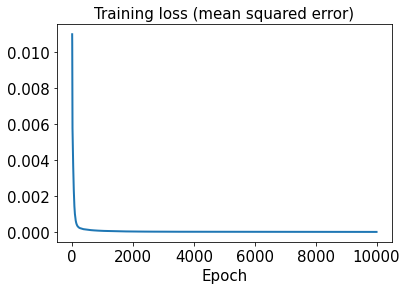

In [45]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

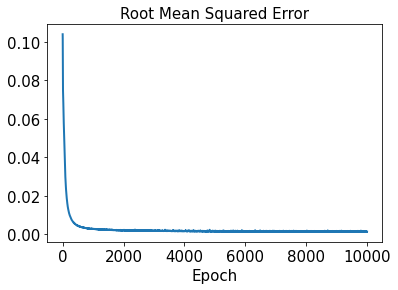

In [46]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [47]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 1ms/step - loss: 1.8272e-05 - rmse: 0.0000e+00


In [48]:
decoded_train = sd.predict(decoded_sensor_train)

In [49]:
decoded_test = sd.predict(decoded_sensor_test)

In [50]:
error_train_abs = np.abs(decoded_train - y_train)

In [51]:
error_test_abs = np.abs(decoded_test - y_test)

In [52]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.10278074


In [53]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.18017194


In [54]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0070816306, 0.051985066, 0.007047159, 0.284638, 0.0050374777, 0.006719777, 0.010802896, 0.030517561, 0.0088584805, 0.52650005, 0.006350778, 0.023854634, 0.15459356, 0.4430088, 0.29047692, 0.0008165053, 0.08802931, 0.009134018, 0.013468501, 0.28338334, 0.23913677, 0.003069807, 0.06076076, 0.0031114798, 0.048683394, 0.17635538, 0.029123785, 0.0070383004, 0.046076596, 0.026027616, 0.013386012, 0.7112506, 0.0027130703, 0.04039684, 0.019118667, 0.012922442, 0.0016987048, 0.23576815, 0.07577197, 0.25988248, 0.53592914, 0.056297388, 0.022305818, 0.20817162, 0.08375066, 0.011957127, 0.054148175, 0.006355859, 0.0042244964, 0.21836247, 0.016402723, 0.0009040186, 0.14121649, 0.010336499, 0.22163379, 0.09927635, 0.020292388, 0.01757707, 0.012139448, 0.0038279165, 0.11678902, 0.0016863225, 0.12514542, 0.019671526, 0.002527424, 0.2790593, 0.025365341, 0.016937826, 0.029881109, 0.04472352, 0.22000572, 0.008645274, 0.2597504, 0.19983597, 0.1132588, 0.14338185, 0.31550032, 0.10763328, 0.46156853, 0.

In [55]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.71769005, 0.004526105, 0.14328367, 0.007234583, 0.20449594, 0.45958933, 0.34362566, 0.005299954, 0.23575726, 0.0010220356, 0.47189865, 0.0026578868, 0.0031044984, 0.009255291, 0.011600593, 0.009001268, 0.22608568, 0.2755761, 0.89891005, 0.01251213, 0.021411406, 0.18822524, 0.09368652, 0.041321944, 0.05019911, 0.66071284, 0.32961452, 0.39422038, 0.05699852, 0.28964904, 0.0041272216, 0.45519307, 0.03814906, 0.025413094, 0.001526977, 0.38129684, 0.1824514, 0.02591438, 0.100385875, 0.0046896357, 0.07028946, 0.6399089, 0.0043723225, 0.00541504]


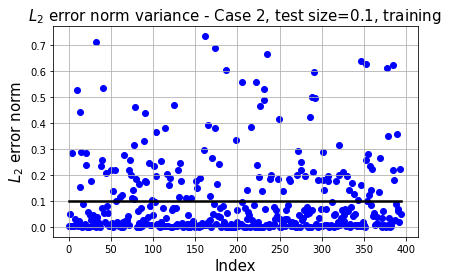

In [56]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

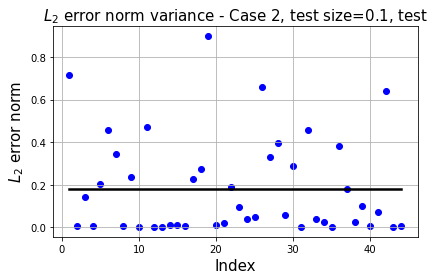

In [57]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

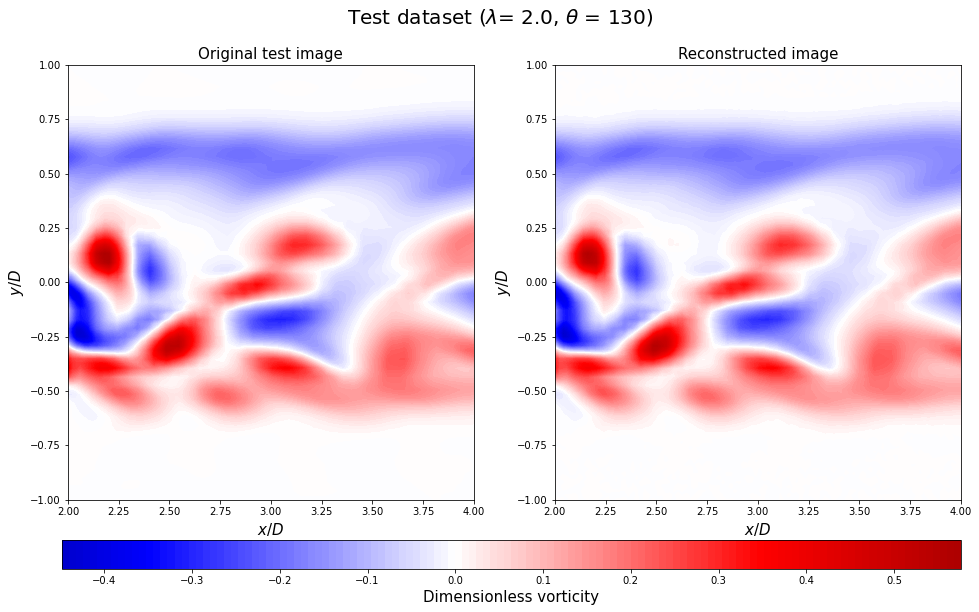

In [58]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

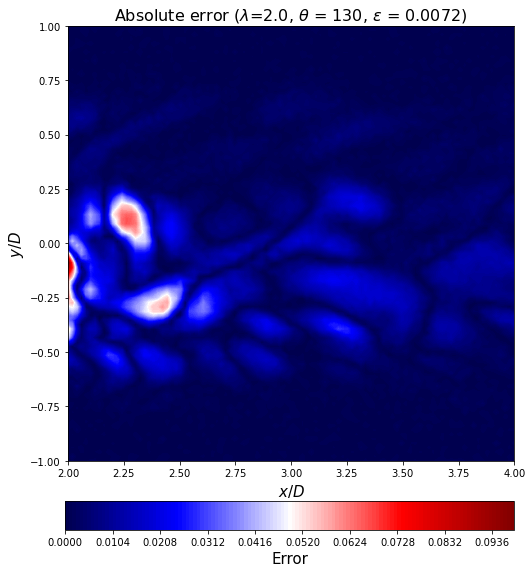

In [59]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

In [62]:
x_txt_train = np.hstack((theta_train.reshape((394, 1)), tsr_train.reshape((394, 1)), x_train.reshape((394, 15))))
x_txt_test = np.hstack((theta_test.reshape((44, 1)), tsr_test.reshape((44, 1)), x_test.reshape((44, 15))))

In [63]:
x_txt = np.vstack((x_txt_test, x_txt_train))

In [64]:
np.savetxt('sensor_data.txt', x_txt, delimiter=" ")